In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

label_dict = {
    'cross.png': 0,
    'crossdown.png': 1,
    'face.png': 2,
    'rail.png': 3,
    'rombo.png': 4
}

label_dict = {value: key for key, value in label_dict.items()}
colors_dict = {
    2: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
    3: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
    1: ['#65b1e5', '#ffcfa5', '#69d669', '#ed9e9e', '#e5daef']
}

def find_score(file_name):
    split = file_name.split('_')
    if (split[2] == '1.png'):
        return 0
    else:
        return 1

def to_float(a):
    return np.array(a[1:-1].split(',')).astype(float)

def getScores(df, names, n_template):
    return np.array([x[0] for x in df.loc[names].values])[:, n_template]

def getDistances(df, names, n_template):
    return np.array([x[1] for x in df.loc[names].values])[:, n_template]

def showHist(scores, n_template, label):
    # score immagini
    fig, ax = plt.subplots(figsize=(10, 4.8))
    data_hist2 = ax.hist(scores, bins=50, color=colors_dict[label][n_template])
    ax.set_xticks(data_hist2[1])
    ax.set_yticks(np.unique(data_hist2[0]))
    ax.tick_params(axis='x', labelsize=10)
    plt.setp(ax.get_xticklabels(), rotation=-60, ha="left", rotation_mode="anchor")
    plt.grid(True)
    plt.title('scores of {} with label {}'.format(label_dict[n_template], label))    
    plt.show()

def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

def plot_svm_line(model, Xrange, label=None):
    Xmin, Xmax = Xrange
    
    # Create grid to evaluate model
    xx = np.linspace(Xmin, Xmax, 100)    
    xy = np.expand_dims(xx, axis=1)
    Z =  model.decision_function(xy).reshape(xx.shape)

    # plot decision boundary and margins
    c = plt.contour(xx, Z, colors='g', 
                # We want to plot lines where the decision function is either -1, 0, or 1
                levels=[-1, 0, 1],
                # We set different line styles for each "decision line"
                linestyles=['--', '-', '--'])
    c.collections[1].set_label(label)
    # Remove this to add +1/-1/0 labels
    # plt.clabel(c, inline=1, fontsize=10)
    # plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k')

poly done
rbf done
sigmoid done
Classification report for classifier SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=5.0, decision_function_shape='ovr', degree=2, gamma='scale',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.25      1.00      0.41        13
           1       0.68      0.27      0.39        55
           2       0.53      0.41      0.46        22

    accuracy                           0.41        90
   macro avg       0.49      0.56      0.42        90
weighted avg       0.58      0.41      0.41        90




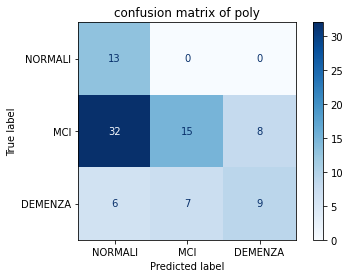

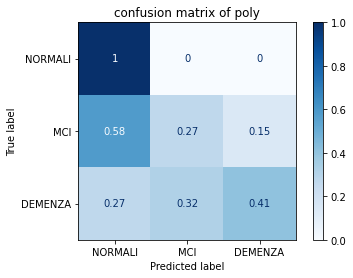

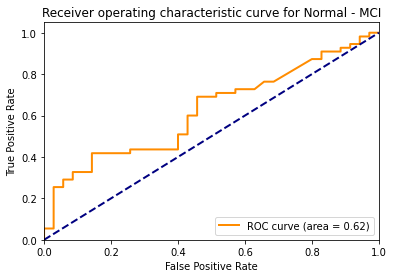

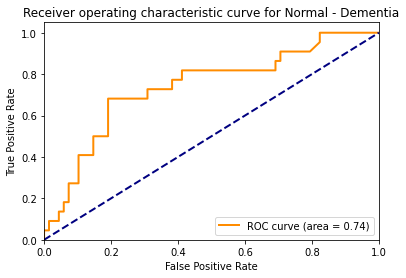

Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.22      1.00      0.36        13
           1       0.50      0.07      0.13        55
           2       0.50      0.50      0.50        22

    accuracy                           0.31        90
   macro avg       0.41      0.52      0.33        90
weighted avg       0.46      0.31      0.25        90




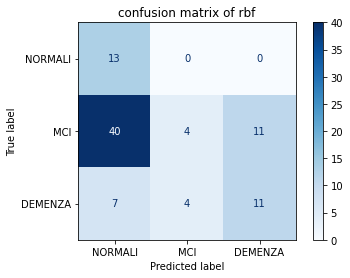

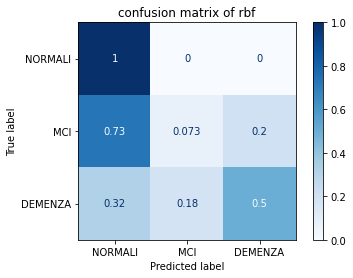

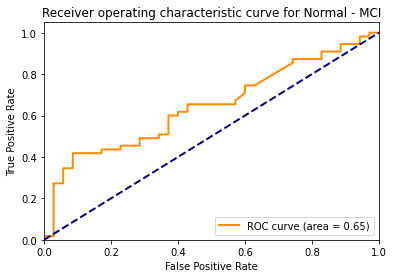

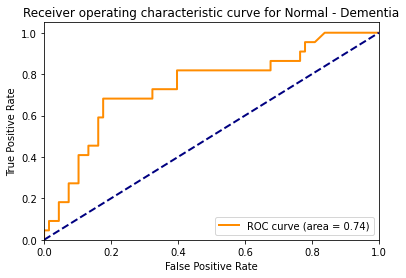

Classification report for classifier SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=-10.0, decision_function_shape='ovr', degree=3, gamma=1,
    kernel='sigmoid', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.22      0.38      0.28        13
           1       0.65      0.55      0.59        55
           2       0.48      0.45      0.47        22

    accuracy                           0.50        90
   macro avg       0.45      0.46      0.45        90
weighted avg       0.55      0.50      0.52        90




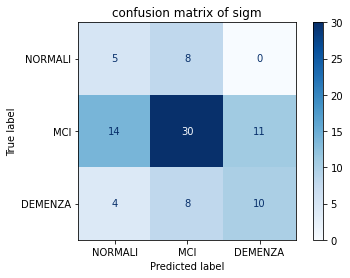

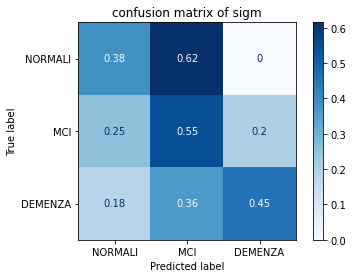

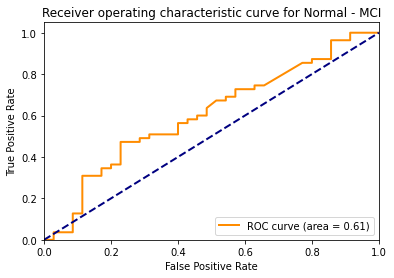

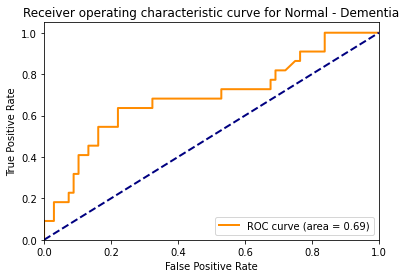

[[array([25, 34, 37, 53, 67]) array([ 9, 12, 35, 57, 61, 70, 73, 79])
  array([], dtype=int64)]
 [array([ 5,  6, 10, 11, 13, 20, 23, 26, 40, 45, 54, 62, 74, 88])
  array([ 0,  3,  8, 14, 16, 19, 22, 27, 28, 29, 30, 31, 32, 36, 38, 42, 43,
       46, 50, 55, 59, 66, 71, 72, 75, 78, 82, 84, 86, 87])
  array([21, 24, 41, 49, 60, 64, 65, 69, 76, 85, 89])]
 [array([ 1,  7, 44, 52]) array([ 2,  4, 15, 18, 39, 47, 56, 83])
  array([17, 33, 48, 51, 58, 63, 68, 77, 80, 81])]]


In [ ]:
# SVM 3 classi pesi bilanciati



import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2


root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
#labels = pd.read_csv(os.path.join(root, 'Dataset bilanciato.csv'), names=labels_name)
labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
names = labels.index.to_numpy()
names_list = np.concatenate((os.listdir(os.path.join(root, 'omografie')), os.listdir(os.path.join(root, 'homog_brutte'))))
names_list_splitted = [name.split('_')[-1][:-4] for name in names_list]
presenza = np.array([name for name in names if name in names_list_splitted])
X = labels.loc[presenza].iloc[:, 3:-1].to_numpy()
y = labels.loc[presenza].iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]
unique2 = np.unique(y)
y_enc = np.array(list(map(label, y)))
'''X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()'''
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)
name_shuffle = shuffle(presenza, random_state=0)[:int(len(X) * 0.4)+1]
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=5, scoring='balanced_accuracy', refit=True)
svm_poly.fit(X_train_scaled, y_train)
print('poly done')
# RBF
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=5, scoring='balanced_accuracy', refit=True)
rbf_poly.fit(X_train_scaled, y_train)
print('rbf done')
# Sigmoid
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=5, scoring='balanced_accuracy', refit=True)
sigm_poly.fit(X_train_scaled, y_train)
print('sigmoid done')
j = 0
names = ['poly', 'rbf', 'sigm']
#joblib.dump(rbf_poly.best_estimator_, './model_abbate.joblib')
#joblib.dump(scaler, './scaler_abbate.joblib')
for m in [svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m_best = m.best_estimator_
    predicted = m_best.predict(X_test_scaled)
    print("Classification report for classifier %s:\n%s\n"
          % (m, classification_report(y_test, predicted)))

    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    #class_names = enc_y.classes_
    class_names = ['NORMALI', 'MCI', 'DEMENZA']
    title = 'confusion matrix of {}'.format(names[j])
    for t, opt in titles_options:
        disp = plot_confusion_matrix(m, X_test_scaled, y_test,
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize = opt)
        disp.ax_.set_title(title)      
        plt.show()
        plt.close('all')
    j+=1
    y_score = m.predict_proba(X_test_scaled)
    title_dict = {
        1:'Normal - MCI',
        2:'Normal - Dementia'
    }    
    for i in [1, 2]:
      fpr, tpr, _ = roc_curve(y_test, y_score[:, i], pos_label=i)
      roc_auc = auc(fpr, tpr)
      lw = 2
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic curve for {}'.format(title_dict[i]))
      plt.legend(loc="lower right")
      plt.show()

normali = np.where(y_test == 0)[0]
MCI = np.where(y_test == 1)[0]
dementi = np.where(y_test == 2)[0]
m = sigm_poly.best_estimator_
predicted = m.predict(X_test_scaled)
matrix1 = np.array([normali[np.where(predicted[normali]==0)[0]], normali[np.where(predicted[normali]==1)[0]], normali[np.where(predicted[normali]==2)[0]]])
matrix2 = np.array([MCI[np.where(predicted[MCI]==0)[0]], MCI[np.where(predicted[MCI]==1)[0]], MCI[np.where(predicted[MCI]==2)[0]]])
matrix3 = np.array([dementi[np.where(predicted[dementi]==0)[0]], dementi[np.where(predicted[dementi]==1)[0]], dementi[np.where(predicted[dementi]==2)[0]]])
matrix = np.vstack((matrix1, matrix2, matrix3))
print(matrix)

In [ ]:
from matplotlib import pyplot as plt
import cv2

plt.rcParams['figure.figsize'] = [15, 7.5]
matrix_no_diag = matrix[~np.eye(matrix.shape[0],dtype=bool)].reshape(matrix.shape[0],-1)
print(matrix_no_diag)
matrix_name = np.array([[name_shuffle[i] for i in el] for el in matrix_no_diag])
print(matrix_name)
matrix_titles = [['True normal predicted MCI', 'True normal predicted dementia'],['True MCI predicted normal', 'True MCI predicted dementia'],
                 ['True dementia predicted normal', 'True dementia predicted MCI']]
for el in range(matrix_name.shape[0]):
  for i in range(len(matrix_name[el])):
    a = matrix_name[el, i]
    if len(a) > 0:
      chuncks = np.array_split(a, np.ceil(a.shape[0]/4))
      print(chuncks)
      for group in chuncks:
        img_list = np.zeros((4, 768, 1360))
        print(len(group))
        for j in range(len(group)):
          name = group[j]
          name_idx = names_list_splitted.index(name)
          filepath = names_list[name_idx]
          print(filepath)
          if name_idx < len(os.listdir(os.path.join(root, 'omografie'))):
            print(j)
            img_list[j] = cv2.imread(os.path.join(root, 'omografie', filepath), cv2.IMREAD_GRAYSCALE)
          else:
            img_list[j] = cv2.imread(os.path.join(root, 'homog_brutte', filepath), cv2.IMREAD_GRAYSCALE)
        img_tot = cv2.vconcat([cv2.hconcat([img_list[0], img_list[1]]), cv2.hconcat([img_list[2], img_list[3]])])
        plt.imshow(img_tot, cmap='gray')
        plt.title(matrix_titles[el][i])
        plt.show()
        plt.close('all')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import joblib
joblib.dump(m, 'gdrive/My Drive/class_3_model.joblib')
joblib.dump(scaler, 'gdrive/My Drive/class_3_scaler.joblib')

['gdrive/My Drive/class_3_scaler.joblib']

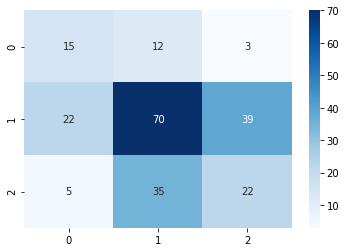

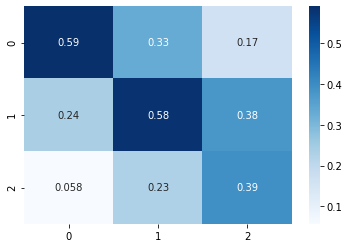

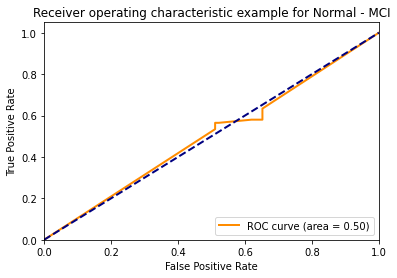

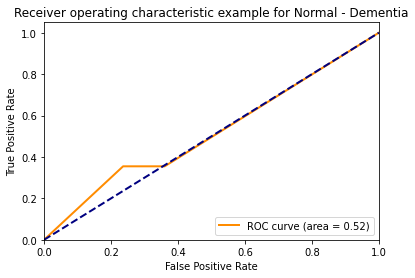

In [ ]:
# Decision tree 3 classi pesi bilanciati
from sklearn.decomposition import PCA
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
from seaborn import heatmap

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2


root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
#labels = pd.read_csv(os.path.join(root, 'Dataset bilanciato.csv'), names=labels_name)
labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
names = labels.index.to_numpy()
names_list = np.concatenate((os.listdir(os.path.join(root, 'omografie')), os.listdir(os.path.join(root, 'homog_brutte'))))
names_list_splitted = [name.split('_')[-1][:-4] for name in names_list]
presenza = np.array([name for name in names if name in names_list_splitted])
X = labels.loc[presenza].iloc[:, 3:-1].to_numpy()
y = labels.loc[presenza].iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]
unique2 = np.unique(y)
y_enc = np.array(list(map(label, y)))
scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(X))
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
y_pred = []
y_prob = []

for i in range(X_pca.shape[0]):
  X_test = X_pca[i, :].reshape(1, -1)
  X_train = np.delete(X_pca, i, axis=0)
  Y_test = y_enc[i]
  Y_train = np.delete(y_enc, i)
  weights = {
            0: 0.40,
            1: 0.10,
            2: 0.40
          }
  # Define Model
  # Define weight of classes: 1=Youngs, 3=Elders
  model = DecisionTreeClassifier(class_weight=weights, random_state=0)  
  model.fit(X_train, Y_train) 
  y_pred.append(model.predict(X_test))
  y_prob.append(model.predict_proba(X_test))

y_prob = np.squeeze(y_prob)
y_pred = np.squeeze(y_pred)
heatmap(confusion_matrix(y_enc, y_pred), annot=True, cmap=plt.cm.Blues)
plt.show()
normalized = c_matrix / c_matrix.astype(np.float).sum(axis=1)
heatmap(normalized, annot=True, cmap=plt.cm.Blues)
for i in [1, 2]:
      fpr, tpr, _ = roc_curve(y_enc, y_prob[:, i], pos_label=i)
      roc_auc = auc(fpr, tpr)
      lw = 2
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic example for {}'.format(title_dict[i]))
      plt.legend(loc="lower right")
      plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[[3 3 3 ... 3 3 3]
 [3 1 3 ... 3 3 1]
 [2 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [1 1 2 ... 3 1 1]
 [3 1 1 ... 3 3 1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
MCI weigth = 0
poly done
rbf done
sigmoid done
[1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 

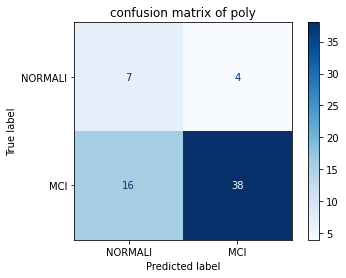

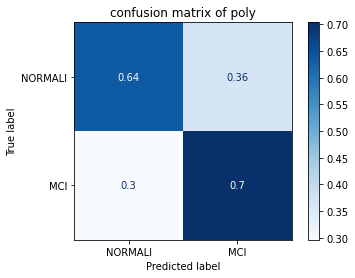

[11372.29027566   401.06917097   991.17096501 -4543.5601893
 -4543.5601893   8581.77821478 -4543.5601893    -73.07240631
 -2677.18844923  2006.63567854  2918.92898136   412.26075069
 -4543.5601893   2921.43186965  5855.29983451  8776.47839777
  4700.64731718  2536.48733112 -1615.75699451  3052.92789258
  1575.83788043  4751.9369701   -565.79650181 -1931.86385627
 -4543.5601893  -2677.18844923 -1543.96282803  4460.35013965
  7504.16515569   182.19036542   107.82049023    80.82000534
  3547.77067392  3930.51878707  3702.16951187  2200.57121525
  6033.97914135 -2361.81447649 -1130.75806993  4191.40115513
  3387.55409443  1007.31428087  2030.65152222  8276.29107916
 -2644.40928145    97.45914638  7659.16471783  8946.58322854
  4372.5690079   2405.01018074  3043.55934067 -1527.6419222
 -4543.5601893  -2677.18844923 -4543.5601893    804.73573409
  4471.09783246  4773.38329971 -3851.40457299  -674.22659591
  -231.09105355  5699.25555867  6113.91796715  -533.15045915
   734.3186427 ]


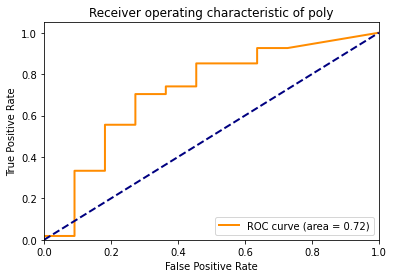

[1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1]
['TM040918250539-112' 'CF280218050239-033' 'CE150518120848-086'
 'GV091117130738-234' 'DG151118250229-132' 'DM151118060161-134'
 'FM070218010455-024' 'TF200917061131-206' 'PB310517070335-186'
 'MU011217110445-244' 'SS131118310532-138' 'ML240317260843-164'
 'LM080917220132-208' 'MM201118110637-131']
Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        11
           1       0.86      0.89      

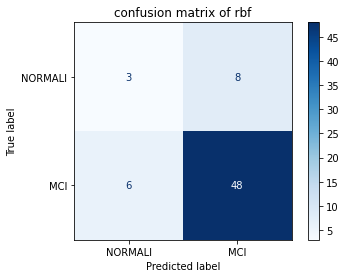

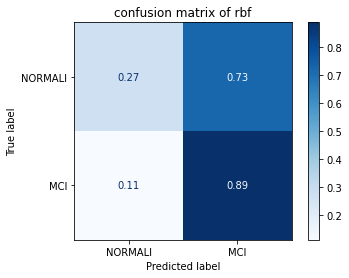

[ 0.66072243  0.66072168  0.66068017 -0.99994127 -0.99994127  0.6607224
 -0.99994127  0.66072509  1.00000998  0.6607609   0.56657434  0.62274026
 -0.99994127  0.66565695  0.66072738  0.6607224   0.66089888  0.66902351
  0.60252931  0.66059825  0.66081246  0.66072275  0.6607224   0.65863623
 -0.99994127  1.00000998  1.00002954  0.66072249  0.6607224   0.66078984
  0.65754191  0.04537246  0.660723    0.66072447  0.66017736  0.66074063
  0.66072252  0.20896406  0.6669005   0.66118067  0.6607224   0.66226182
  0.6637059   0.66072242 -0.0488063   0.6608739   0.66074123  0.6607224
  0.66071747  0.66109398  0.66072379 -0.99996708 -0.99994127  1.00000998
 -0.99994127  0.59508328  0.66072925  0.6607224   0.00491718  0.65778317
  0.62009523  0.66072391  0.6607224   0.64938377  0.67952884]


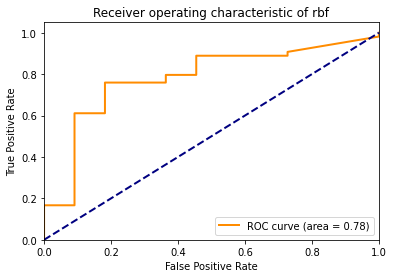

[1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1]
[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1]
['TM040918250539-112' 'CF280218050239-033' 'SF060618270642-069'
 'GP260118160537-016' 'GR191217181038-246' 'CE150518120848-086'
 'GV091117130738-234' 'FS260618140465-077' 'RG221217011139-239'
 'ZA100418080943-055' 'DG151118250229-132' 'DM151118060161-134'
 'TF200917061131-206' 'PB310517070335-186' 'IA060917160536-207'
 'MU011217110445-244' 'SS131118310532-138' 'MM060918271246-117'
 'ML240317260843-164' 'DG210618231136-076']
Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              

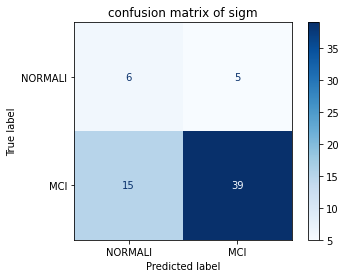

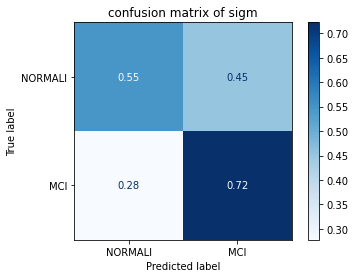

[ 1.62660444  0.50896321  0.89830975 -0.99986184 -0.99986184  0.53139601
 -0.99986184  0.57697882 -1.09499065  3.6433088   0.28703326 -0.05505011
 -0.99986184  1.12586836  0.51826211  0.90160149  2.15727196  1.06693161
 -0.98175547  0.5000798   0.04403075  1.1336494   2.79225329  0.40103093
 -0.99986184 -1.09499065 -0.46335012  1.72209999  0.63558427  0.50919483
 -0.10513724  0.17524941  0.50936909  0.54563802  0.53666907  4.50915144
  2.23964802 -1.4700923   0.69023846  0.81629762  3.06938271  0.52540349
  1.01018068  0.52389882 -2.52063167  2.89967005 -0.65178913  0.5145208
  0.50863542  0.90732229  0.51487196 -1.00045465 -0.99986184 -1.09499065
 -0.99986184  0.00752525  1.04334161  1.59755205 -1.76101699  0.4659127
 -1.70449102  1.86508688  2.95042229 -1.13587723  0.87756092]


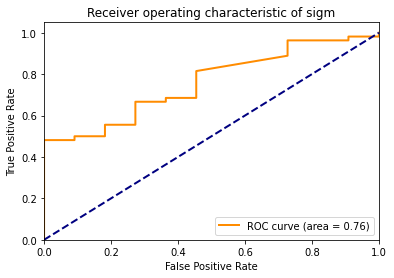

In [ ]:
# SVM 2 classi (solo MCI) pesi bilanciati
"""SVM.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19gZOIxFJJC3bVHMfrgTynHz6t33cUjxu
"""

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2


root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
#labels = pd.read_csv(os.path.join(root, 'Dataset bilanciato.csv'), names=labels_name)
labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
names = labels.index.to_numpy()
names_list = np.concatenate((os.listdir(os.path.join(root, 'omografie')), os.listdir(os.path.join(root, 'homog_brutte'))))
names_list_splitted = [name.split('_')[-1][:-4] for name in names_list]
presenza = np.array([name for name in names if name in names_list_splitted])
X = labels.loc[presenza].iloc[:, 3:-1].to_numpy()
y = labels.loc[presenza].iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]
unique2 = np.unique(y)
y_enc = np.array(list(map(label, y)))
print(y_enc)
last = np.where(y_enc == 1)[0][-1]
X = X[:last+1]
y_enc = y_enc[:last+1]
print(X)
print(y_enc)
'''X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()'''
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)
name_shuffle = shuffle(presenza, random_state=0)[:int(len(X) * 0.4)+1]
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
for i in np.arange(1):
  print('MCI weigth = {}'.format(i))
  param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
        'coef0': np.linspace(-10, 10, 5),
        'degree': [2, 3, 4]}
  svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced'), param_grid,
                          cv=5, scoring='recall', refit=True)
  svm_poly.fit(X_train_scaled, y_train)
  print('poly done')
  # RBF
  param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
  rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid,
                          cv=5, scoring='recall', refit=True)
  rbf_poly.fit(X_train_scaled, y_train)
  print('rbf done')
  # Sigmoid
  param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'coef0': np.linspace(-10, 10, 5)}
  sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced'), param_grid,
                          cv=5, scoring='recall', refit=True)
  sigm_poly.fit(X_train_scaled, y_train)
  print('sigmoid done')
  j = 0
  names = ['poly', 'rbf', 'sigm']
  for m in [svm_poly, rbf_poly, sigm_poly]:
      cv_score = m.best_score_
      m = m.best_estimator_
      predicted = m.predict(X_test_scaled)
      print(predicted)
      print(y_test)
      mispredicted = np.where(np.not_equal(y_test, predicted))
      print(name_shuffle[mispredicted])
      print("Classification report for classifier %s:\n%s\n"
            % (m, classification_report(y_test, predicted)))

      titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
      #class_names = enc_y.classes_
      class_names = ['NORMALI', 'MCI', 'DEMENZA']
      title = 'confusion matrix of {}'.format(names[j])
      for t, opt in titles_options:
        disp = plot_confusion_matrix(m, X_test_scaled, y_test,
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize = opt)
        disp.ax_.set_title(title)      
        plt.show()
        plt.close('all')
      
      y_score = m.decision_function(X_test_scaled)
      fpr, tpr, _ = roc_curve(y_test, y_score)
      print(y_score)
      roc_auc = auc(fpr, tpr)
      lw = 2
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic of {}'.format(title.split(' ')[-1]))
      plt.legend(loc="lower right")
      plt.show()
      j += 1


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[[3 3 3 ... 3 3 3]
 [3 1 3 ... 3 3 1]
 [2 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [1 1 2 ... 3 1 1]
 [3 1 1 ... 3 3 1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
MCI weigth = 0.24210526315789474
[1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 

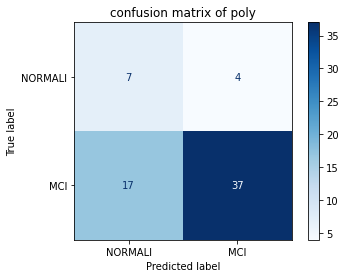

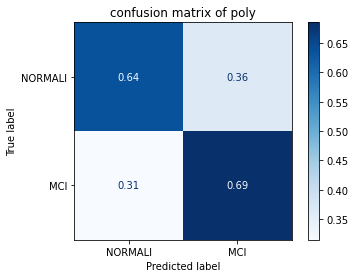

[ 4399.27054318   167.27457789   374.00018514 -1758.65766365
 -1758.65766365  3339.94911811 -1758.65766365   -48.78329107
 -1042.94476721   699.90576953  1131.2731808    155.09709321
 -1758.65766365  1132.13490625  2255.93415795  3351.05678572
  1774.87553041   995.06795306  -624.36410537  1167.4521619
   607.74878165  1831.8179225   -274.88705082  -753.01448401
 -1758.65766365 -1042.94476721  -590.27903436  1691.8506017
  2914.67797547    69.06810743    28.30669987    39.15107768
  1359.36823822  1499.94245226  1436.29745877   770.31060552
  2315.09545578  -919.87048599  -477.57030014  1627.51917886
  1269.11459287   377.0984567    797.63191195  3176.31503185
 -1023.76245964   -25.81496875  2974.11848719  3423.72798768
  1691.0279246    931.90096322  1141.25374498  -603.62636593
 -1758.65766365 -1042.94476721 -1758.65766365   306.12861459
  1753.28511273  1852.49980972 -1493.26405528  -261.80522451
   -83.32378903  2156.49218795  2321.90249374  -198.23831264
   250.18752555]


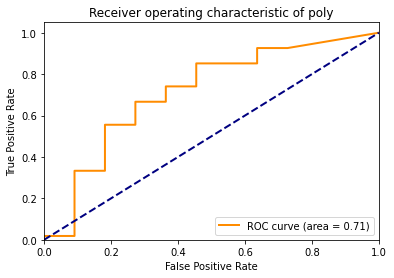

[1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1]
['TM040918250539-112' 'CF280218050239-033' 'CE150518120848-086'
 'GV091117130738-234' 'DG151118250229-132' 'DM151118060161-134'
 'FM070218010455-024' 'TF200917061131-206' 'MU011217110445-244'
 'SS131118310532-138' 'ML240317260843-164' 'LM080917220132-208'
 'MM201118110637-131']
Classification report for classifier SVC(C=1, break_ties=False, cache_size=200,
    class_weight={1: 0.24210526315789474}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.38      0.27      0.32        11
           1       0.86      0.91      0.8

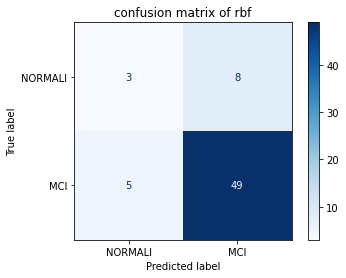

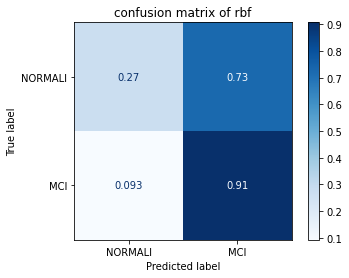

[ 0.77591781  0.77591736  0.7758993  -1.00010052 -1.00010052  0.77591779
 -1.00010052  0.77592008  0.8811094   0.77594327  0.71825083  0.75325564
 -1.00010052  0.77985301  0.77592109  0.77591779  0.77603454  0.78027746
  0.73948722  0.77586258  0.77401441  0.77591803  0.7759178   0.7736096
 -1.00010052  0.8811094   0.95411873  0.77591785  0.77591779  0.77595171
  0.77400955  0.39900331  0.77591814  0.77591916  0.77572004  0.77592985
  0.77591788  0.29279054  0.77999513  0.77630384  0.77591779  0.77720579
  0.77788995  0.77591782  0.30681142  0.77601803  0.77593021  0.77591779
  0.77591485  0.77616298  0.77591871 -0.22102261 -1.00010052  0.8811094
 -1.00010052  0.74234569  0.77592232  0.77591779  0.07838127  0.77371018
  0.73246825  0.77591879  0.77591779  0.76374565  0.78830589]


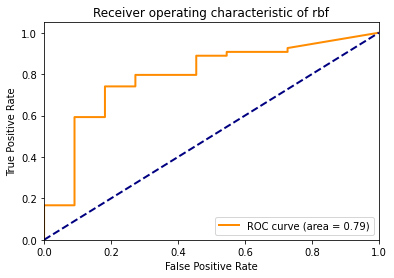

[1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1]
[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1]
['TM040918250539-112' 'CF280218050239-033' 'SF060618270642-069'
 'GR191217181038-246' 'CE150518120848-086' 'GV091117130738-234'
 'FS260618140465-077' 'RG221217011139-239' 'DM151118060161-134'
 'TF200917061131-206' 'PB310517070335-186' 'IA060917160536-207'
 'MU011217110445-244' 'SS131118310532-138' 'MM060918271246-117'
 'ML240317260843-164' 'DG210618231136-076']
Classification report for classifier SVC(C=1, break_ties=False, cache_size=200,
    class_weight={1: 0.24210526315789474}, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

     

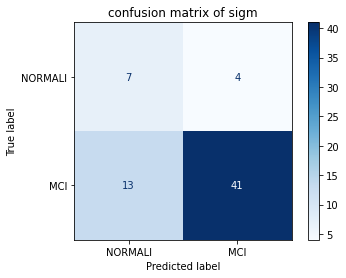

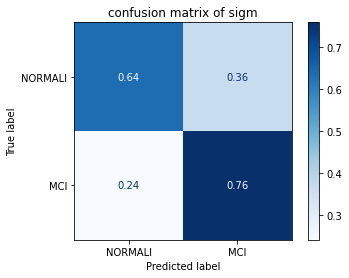

[ 1.60411974e+00  4.89472964e-01  6.02429730e-01 -1.00036783e+00
 -1.00036783e+00  5.11676484e-01 -1.00036783e+00  5.42470135e-01
 -3.11306173e-01  3.69376400e+00  5.40466278e-02  1.67148572e-01
 -1.00036783e+00  6.90045763e-01  4.99030965e-01  8.80402980e-01
  2.17340872e+00  6.93799089e-01 -8.71165683e-01  4.83070170e-01
  1.74724641e-01  1.11918233e+00  2.82881710e+00  3.41574944e-01
 -1.00036783e+00 -3.11306173e-01 -4.99252003e-02  1.72757243e+00
  6.15017894e-01  4.89555687e-01  4.02629323e-03 -5.49626724e-01
  4.89865663e-01  5.27490793e-01  5.50117090e-01  4.57589835e+00
  2.23610189e+00 -5.88179771e-01  8.66910655e-01  7.36484191e-01
  3.08799889e+00  4.97465695e-01  9.11121216e-01  5.04255878e-01
 -1.58719918e+00  2.93769528e+00 -9.26261338e-02  4.95487200e-01
  4.89416390e-01  8.97439749e-01  4.95587076e-01 -9.99653665e-01
 -1.00036783e+00 -3.11306173e-01 -1.00036783e+00  1.55463014e-01
  9.70691389e-01  1.57485563e+00 -5.01548726e-01  4.49947942e-01
 -3.90794197e-01  1.88342

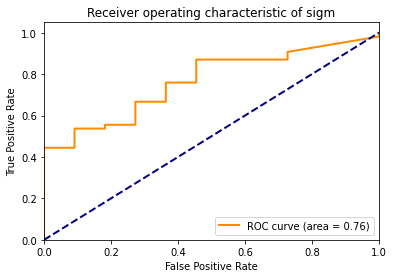

[[array([ 3, 12, 52]) array([23, 31, 34, 37, 41, 47, 58, 63])]
 [array([ 4,  6, 24, 51, 54])
  array([ 0,  1,  2,  5,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 38, 39, 40, 42, 43,
       44, 45, 46, 48, 49, 50, 53, 55, 56, 57, 59, 60, 61, 62, 64])]]


In [ ]:
# SVM 2 classi (solo MCI) pesi sbilanciati su MCI
"""SVM.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19gZOIxFJJC3bVHMfrgTynHz6t33cUjxu
"""


import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2


root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
#labels = pd.read_csv(os.path.join(root, 'Dataset bilanciato.csv'), names=labels_name)
labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
names = labels.index.to_numpy()
names_list = np.concatenate((os.listdir(os.path.join(root, 'omografie')), os.listdir(os.path.join(root, 'homog_brutte'))))
names_list_splitted = [name.split('_')[-1][:-4] for name in names_list]
presenza = np.array([name for name in names if name in names_list_splitted])
X = labels.loc[presenza].iloc[:, 3:-1].to_numpy()
y = labels.loc[presenza].iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]
unique2 = np.unique(y)
y_enc = np.array(list(map(label, y)))
print(y_enc)
last = np.where(y_enc == 1)[0][-1]
X = X[:last+1]
y_enc = y_enc[:last+1]
print(X)
print(y_enc)
'''X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()'''
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)
name_shuffle = shuffle(presenza, random_state=0)[:int(len(X) * 0.4)+1]
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#for i in np.linspace(0.1, 0.25, num=20):
i = 0.24210526315789474
print('MCI weigth = {}'.format(i))
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight={1:i}), param_grid,
                        cv=5, scoring='recall', refit=True)
svm_poly.fit(X_train_scaled, y_train)

# RBF
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight={1:i}), param_grid,
                        cv=5, scoring='recall', refit=True)
rbf_poly.fit(X_train_scaled, y_train)

# Sigmoid
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight={1:i}), param_grid,
                        cv=5, scoring='recall', refit=True)
sigm_poly.fit(X_train_scaled, y_train)

j = 0
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    predicted = m.predict(X_test_scaled)
    print(predicted)
    print(y_test)
    mispredicted = np.where(np.not_equal(y_test, predicted))
    print(name_shuffle[mispredicted])
    print("Classification report for classifier %s:\n%s\n"
          % (m, classification_report(y_test, predicted)))

    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    #class_names = enc_y.classes_
    class_names = ['NORMALI', 'MCI', 'DEMENZA']
    title = 'confusion matrix of {}'.format(names[j])
    for t, opt in titles_options:
      disp = plot_confusion_matrix(m, X_test_scaled, y_test,
                                display_labels=class_names,
                                cmap=plt.cm.Blues,
                                normalize = opt)
      disp.ax_.set_title(title)      
      plt.show()
      plt.close('all')
    
    y_score = m.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    print(y_score)
    roc_auc = auc(fpr, tpr)
    lw = 2
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of {}'.format(title.split(' ')[-1]))
    plt.legend(loc="lower right")
    plt.show()
    j += 1

normali = np.where(y_test == 0)[0]
MCI = np.where(y_test == 1)[0]
m = rbf_poly.best_estimator_
predicted = m.predict(X_test_scaled)
matrix1 = np.array([normali[np.where(predicted[normali]==0)[0]], normali[np.where(predicted[normali]==1)[0]]])
matrix2 = np.array([MCI[np.where(predicted[MCI]==0)[0]], MCI[np.where(predicted[MCI]==1)[0]]])
matrix = np.vstack((matrix1, matrix2))
print(matrix)

[array(['CE150518120848-086', 'DG151118250229-132', 'DM151118060161-134',
       'FM070218010455-024'], dtype='<U18'), array(['TF200917061131-206', 'MU011217110445-244', 'LM080917220132-208',
       'MM201118110637-131'], dtype='<U18')]
4
MAG2018_CE150518120848-086.png
0
NOV2018_DG151118250229-132.png
1
NOV2018_DM151118060161-134.png
2
FEB2018_FM070218010455-024.png
3


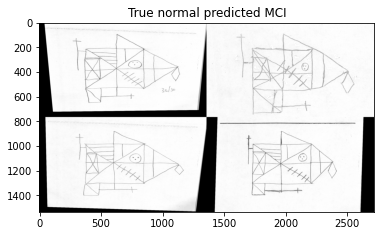

4
SET2017_TF200917061131-206.png
DIC2017_MU011217110445-244.png
1
SET2017_LM080917220132-208.png
NOV2018_MM201118110637-131.png


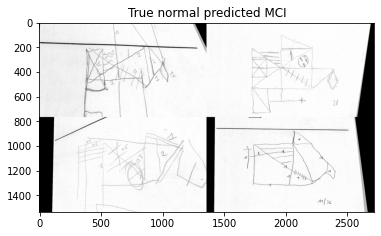

[array(['TM040918250539-112', 'CF280218050239-033', 'GV091117130738-234'],
      dtype='<U18'), array(['SS131118310532-138', 'ML240317260843-164'], dtype='<U18')]
3
SET2018_TM040918250539-112.png
0
FEB2018_CF280218050239-033.png
1
NOV2017_GV091117130738-234.png
2


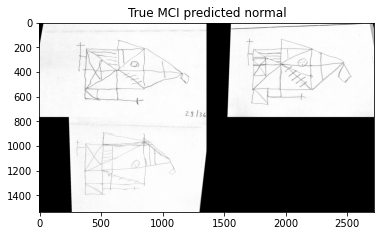

2
NOV2018_SS131118310532-138.png
MAR2017_ML240317260843-164.png
1


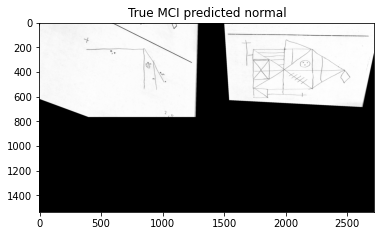

In [ ]:
from matplotlib import pyplot as plt
import cv2

matrix_no_diag = matrix[~np.eye(matrix.shape[0],dtype=bool)].reshape(matrix.shape[0],-1)
matrix_name = np.array([[name_shuffle[i] for i in el] for el in matrix_no_diag])
matrix_titles = [['True normal predicted MCI'],['True MCI predicted normal']]
for el in range(matrix_name.shape[0]):
  for i in range(len(matrix_name[el])):
    a = matrix_name[el, i]
    if len(a) > 0:
      chuncks = np.array_split(a, np.ceil(a.shape[0]/4))
      print(chuncks)
      for group in chuncks:
        img_list = np.zeros((4, 768, 1360))
        print(len(group))
        for j in range(len(group)):
          name = group[j]
          name_idx = names_list_splitted.index(name)
          filepath = names_list[name_idx]
          print(filepath)
          if name_idx < len(os.listdir(os.path.join(root, 'omografie'))):
            print(j)
            img_list[j] = cv2.imread(os.path.join(root, 'omografie', filepath), cv2.IMREAD_GRAYSCALE)
          else:
            img_list[j] = cv2.imread(os.path.join(root, 'homog_brutte', filepath), cv2.IMREAD_GRAYSCALE)
        img_tot = cv2.vconcat([cv2.hconcat([img_list[0], img_list[1]]), cv2.hconcat([img_list[2], img_list[3]])])
        plt.imshow(img_tot, cmap='gray')
        plt.title(matrix_titles[el][i])
        plt.show()
        plt.close('all')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[[3 3 3 ... 3 3 3]
 [3 1 3 ... 3 3 1]
 [2 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [1 1 2 ... 3 1 1]
 [3 1 1 ... 3 3 1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 0 1 1 1 

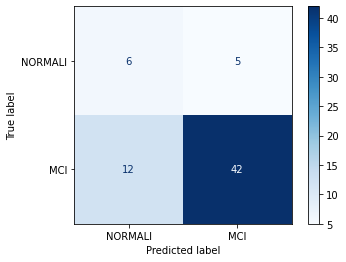

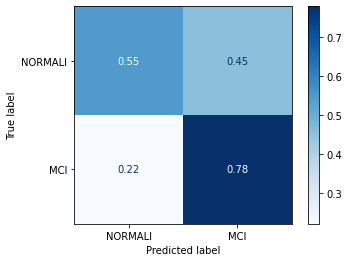

[1.         1.         1.         0.15616438 0.15616438 1.
 0.15616438 1.         1.         1.         0.         1.
 0.15616438 1.         1.         1.         1.         1.
 0.         1.         0.         1.         1.         0.10982659
 0.15616438 1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.33043478 1.
 1.         1.         0.         0.         1.         1.
 1.         1.         0.         1.         1.         1.
 0.         1.         1.         0.         0.15616438 1.
 0.15616438 1.         1.         1.         0.         1.
 1.         1.         1.         1.         1.        ]


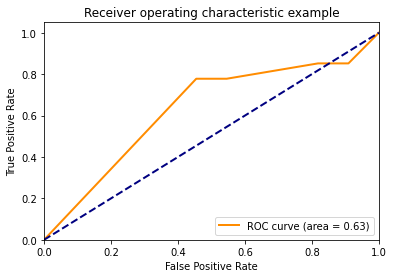

In [ ]:
# decisiontree 2 classi (solo MCI) pesi bilanciati
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib



def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2

root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
#labels = pd.read_csv(os.path.join(root, 'Dataset bilanciato.csv'), names=labels_name)
labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
names = labels.index.to_numpy()
names_list = np.concatenate((os.listdir(os.path.join(root, 'omografie')), os.listdir(os.path.join(root, 'homog_brutte'))))
names_list_splitted = [name.split('_')[-1][:-4] for name in names_list]
presenza = np.array([name for name in names if name in names_list_splitted])
X = labels.loc[presenza].iloc[:, 3:-1].to_numpy()
y = labels.loc[presenza].iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]
unique2 = np.unique(y)
y_enc = np.array(list(map(label, y)))
print(y_enc)
last = np.where(y_enc == 1)[0][-1]
X = X[:last+1]
y_enc = y_enc[:last+1]
print(X)
print(y_enc)
'''X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()'''
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)
name_shuffle = shuffle(presenza, random_state=0)[:int(len(X) * 0.4)+1]

clf = DecisionTreeClassifier(class_weight='balanced', random_state=0).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(predicted)
print("Classification report for classifier %s:\n%s\n"
            % (clf, classification_report(y_test, predicted)))
titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
      #class_names = enc_y.classes_
class_names = ['NORMALI', 'MCI']
for title, opt in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize = opt)
      
        plt.show()
        plt.close('all')
y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()  

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[[3 3 3 ... 3 3 3]
 [3 1 3 ... 3 3 1]
 [2 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [1 1 2 ... 3 1 1]
 [3 1 1 ... 3 3 1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
MCI weigth = 0.13157894736842105
[1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 

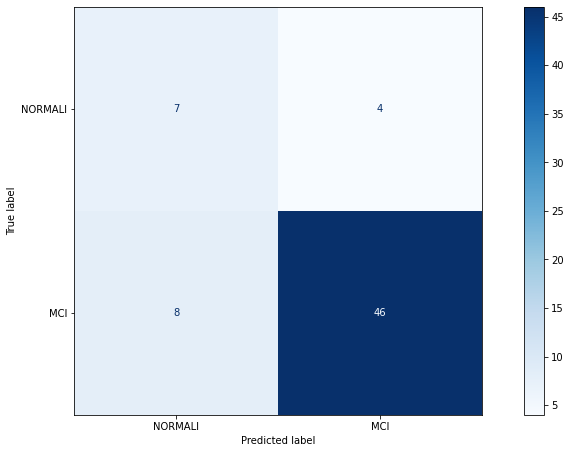

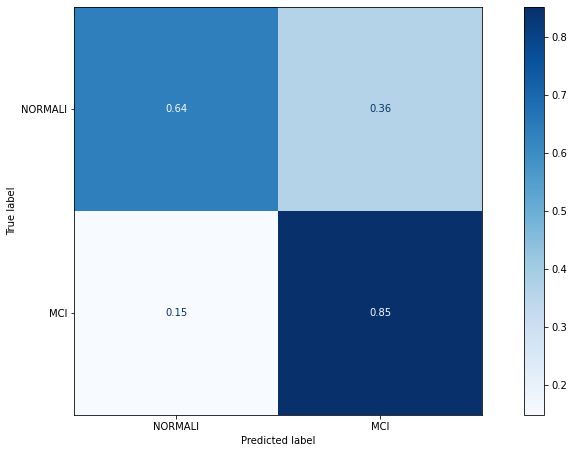

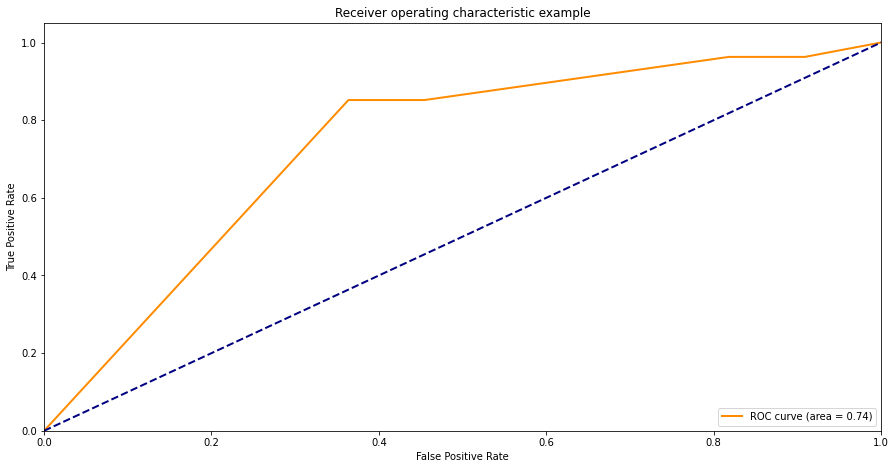

[[array([], dtype=int64)
  array([ 3, 12, 23, 31, 34, 37, 41, 47, 52, 58, 63])]
 [array([], dtype=int64)
  array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 38, 39,
       40, 42, 43, 44, 45, 46, 48, 49, 50, 51, 53, 54, 55, 56, 57, 59, 60,
       61, 62, 64])]]


In [ ]:
# decision-tree 2 classi (solo MCI) pesi sbilanciati su MCI
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib



def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2

root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
#labels = pd.read_csv(os.path.join(root, 'Dataset bilanciato.csv'), names=labels_name)
labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
names = labels.index.to_numpy()
names_list = np.concatenate((os.listdir(os.path.join(root, 'omografie')), os.listdir(os.path.join(root, 'homog_brutte'))))
names_list_splitted = [name.split('_')[-1][:-4] for name in names_list]
presenza = np.array([name for name in names if name in names_list_splitted])
X = labels.loc[presenza].iloc[:, 3:-1].to_numpy()
y = labels.loc[presenza].iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]
unique2 = np.unique(y)
y_enc = np.array(list(map(label, y)))
print(y_enc)
last = np.where(y_enc == 1)[0][-1]
X = X[:last+1]
y_enc = y_enc[:last+1]
print(X)
print(y_enc)
'''X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()'''
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)
name_shuffle = shuffle(presenza, random_state=0)[:int(len(X) * 0.4)+1]
i =  0.13157894736842105
print('MCI weigth = {}'.format(i))
clf = DecisionTreeClassifier(class_weight={1:i}, random_state=0).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(predicted)
print("Classification report for classifier %s:\n%s\n"
            % (clf, classification_report(y_test, predicted)))
titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
      #class_names = enc_y.classes_
class_names = ['NORMALI', 'MCI']
for title, opt in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize = opt)
      
        plt.show()
        plt.close('all')
y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

normali = np.where(y_test == 0)[0]
MCI = np.where(y_test == 1)[0]

predicted = clf.predict(X_test_scaled)
matrix1 = np.array([normali[np.where(predicted[normali]==0)[0]], normali[np.where(predicted[normali]==1)[0]]])
matrix2 = np.array([MCI[np.where(predicted[MCI]==0)[0]], MCI[np.where(predicted[MCI]==1)[0]]])
matrix = np.vstack((matrix1, matrix2))
print(matrix)

In [ ]:
joblib.dump(clf, 'gdrive/My Drive/class_2_model.joblib')

['gdrive/My Drive/class_2_model.joblib']

[array(['NP070617160344-192', 'BR310118050144-019', 'CE150518120848-086',
       'DG151118250229-132'], dtype='<U18'), array(['DM151118060161-134', 'FM070218010455-024', 'TF200917061131-206',
       'MU011217110445-244'], dtype='<U18'), array(['BL150317130235-168', 'LM080917220132-208', 'MM201118110637-131'],
      dtype='<U18')]
4
GIU2017_NP070617160344-192.png
0
GEN2018_BR310118050144-019.png
1
MAG2018_CE150518120848-086.png
2
NOV2018_DG151118250229-132.png
3


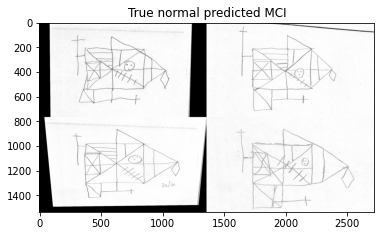

4
NOV2018_DM151118060161-134.png
0
FEB2018_FM070218010455-024.png
1
SET2017_TF200917061131-206.png
DIC2017_MU011217110445-244.png
3


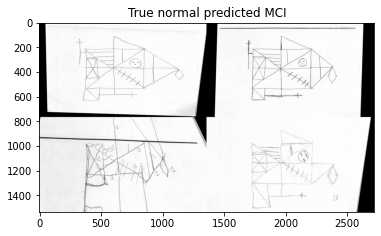

3
MAR2017_BL150317130235-168.png
0
SET2017_LM080917220132-208.png
NOV2018_MM201118110637-131.png


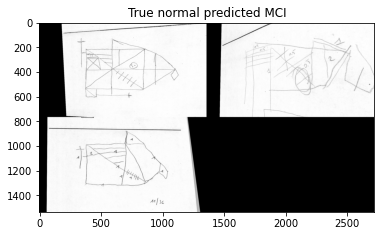

In [ ]:
from matplotlib import pyplot as plt
import cv2

matrix_no_diag = matrix[~np.eye(matrix.shape[0],dtype=bool)].reshape(matrix.shape[0],-1)
matrix_name = np.array([[name_shuffle[i] for i in el] for el in matrix_no_diag])
matrix_titles = [['True normal predicted MCI'],['True MCI predicted normal']]
for el in range(matrix_name.shape[0]):
  for i in range(len(matrix_name[el])):
    a = matrix_name[el, i]
    if len(a) > 0:
      chuncks = np.array_split(a, np.ceil(a.shape[0]/4))
      print(chuncks)
      for group in chuncks:
        img_list = np.zeros((4, 768, 1360))
        print(len(group))
        for j in range(len(group)):
          name = group[j]
          name_idx = names_list_splitted.index(name)
          filepath = names_list[name_idx]
          print(filepath)
          if name_idx < len(os.listdir(os.path.join(root, 'omografie'))):
            print(j)
            img_list[j] = cv2.imread(os.path.join(root, 'omografie', filepath), cv2.IMREAD_GRAYSCALE)
          else:
            img_list[j] = cv2.imread(os.path.join(root, 'homog_brutte', filepath), cv2.IMREAD_GRAYSCALE)
        img_tot = cv2.vconcat([cv2.hconcat([img_list[0], img_list[1]]), cv2.hconcat([img_list[2], img_list[3]])])
        plt.imshow(img_tot, cmap='gray')
        plt.title(matrix_titles[el][i])
        plt.show()
        plt.close('all')

poly done
rbf done
sigmoid done
Classification report for classifier SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=10.0, decision_function_shape='ovr', degree=2, gamma='scale',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        58
           1       0.70      0.35      0.46        55
           2       0.60      0.60      0.60        25

    accuracy                           0.65       138
   macro avg       0.65      0.64      0.61       138
weighted avg       0.66      0.65      0.62       138




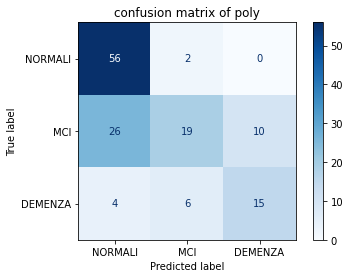

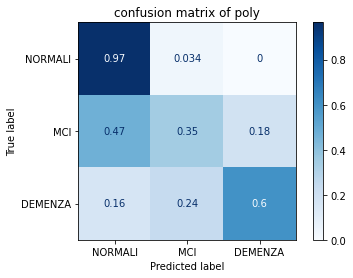

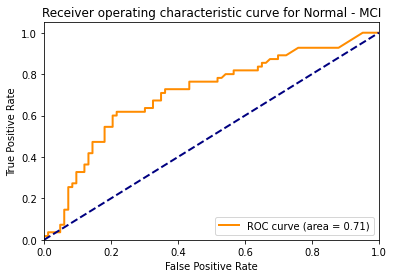

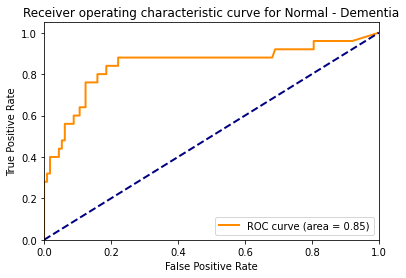

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.66      0.97      0.78        58
           1       0.62      0.33      0.43        55
           2       0.54      0.52      0.53        25

    accuracy                           0.63       138
   macro avg       0.61      0.60      0.58       138
weighted avg       0.62      0.63      0.60       138




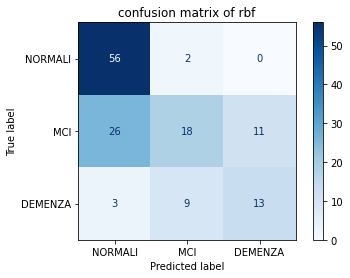

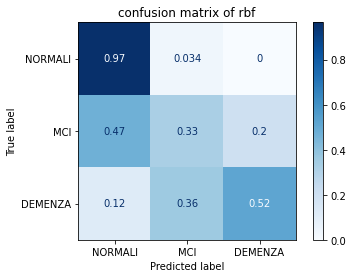

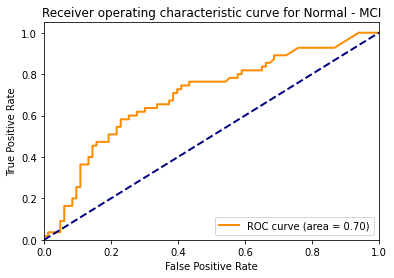

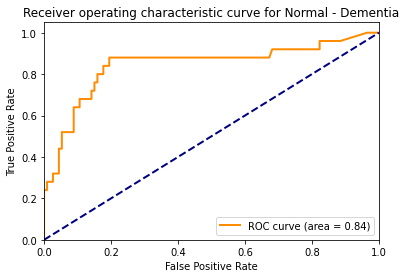

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        58
           1       0.69      0.33      0.44        55
           2       0.58      0.60      0.59        25

    accuracy                           0.64       138
   macro avg       0.64      0.63      0.60       138
weighted avg       0.65      0.64      0.61       138




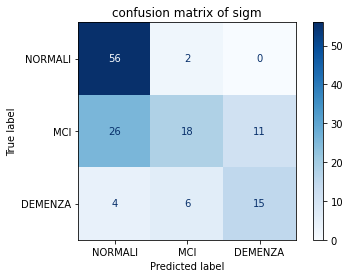

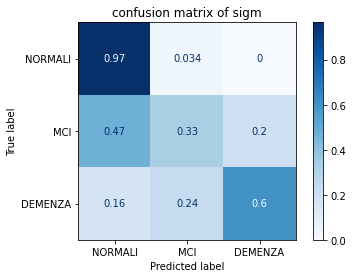

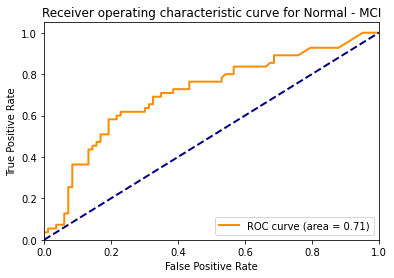

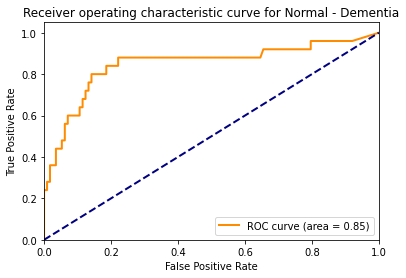

In [ ]:
# DATASET BILANCIATO SVM 3 classi bilanciate
"""SVM.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19gZOIxFJJC3bVHMfrgTynHz6t33cUjxu
"""


import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib


root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
labels = pd.read_csv(os.path.join(root, 'nuovo_dataset_bilanciato.csv'), names=labels_name)
#labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=5, scoring='balanced_accuracy', refit=True)
svm_poly.fit(X_train_scaled, y_train)
print('poly done')
# RBF
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=5, scoring='balanced_accuracy', refit=True)
rbf_poly.fit(X_train_scaled, y_train)
print('rbf done')
# Sigmoid
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=5, scoring='balanced_accuracy', refit=True)
sigm_poly.fit(X_train_scaled, y_train)
print('sigmoid done')
j = 0
names = ['poly', 'rbf', 'sigm']
#joblib.dump(rbf_poly.best_estimator_, './model_abbate.joblib')
#joblib.dump(scaler, './scaler_abbate.joblib')
for m in [svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    predicted = m.predict(X_test_scaled)
    print("Classification report for classifier %s:\n%s\n"
          % (m, classification_report(y_test, predicted)))

    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    #class_names = enc_y.classes_
    class_names = ['NORMALI', 'MCI', 'DEMENZA']
    title = 'confusion matrix of {}'.format(names[j])
    for t, opt in titles_options:
        disp = plot_confusion_matrix(m, X_test_scaled, y_test,
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize = opt)
        disp.ax_.set_title(title)      
        plt.show()
        plt.close('all')
    j+=1
    y_score = m.predict_proba(X_test_scaled)
    title_dict = {
        1:'Normal - MCI',
        2:'Normal - Dementia'
    }    
    for i in [1, 2]:
      fpr, tpr, _ = roc_curve(y_test, y_score[:, i], pos_label=i)
      roc_auc = auc(fpr, tpr)
      lw = 2
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic curve for {}'.format(title_dict[i]))
      plt.legend(loc="lower right")
      plt.show()



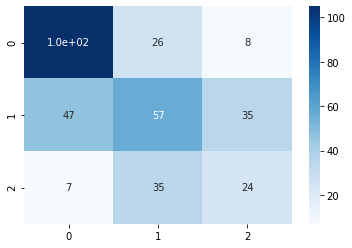

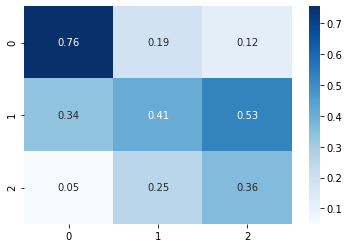

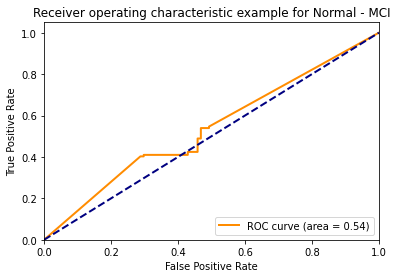

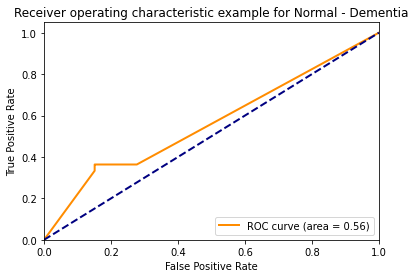

In [ ]:
# DATASET BILANCIATO Decision tree 3 classi pesi bilanciati
from sklearn.decomposition import PCA
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
from seaborn import heatmap

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2


root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
labels = pd.read_csv(os.path.join(root, 'nuovo_dataset_bilanciato.csv'), names=labels_name)
#labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()
scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(X))
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
y_pred = []
y_prob = []

for i in range(X_pca.shape[0]):
  X_test = X_pca[i, :].reshape(1, -1)
  X_train = np.delete(X_pca, i, axis=0)
  Y_test = y_enc[i]
  Y_train = np.delete(y_enc, i)
  weights = {
            0: 0.20,
            1: 0.70,
            2: 0.10
          }
  # Define Model
  # Define weight of classes: 1=Youngs, 3=Elders
  model = DecisionTreeClassifier(class_weight='balanced', random_state=0)  
  model.fit(X_train, Y_train) 
  y_pred.append(model.predict(X_test))
  y_prob.append(model.predict_proba(X_test))

y_prob = np.squeeze(y_prob)
y_pred = np.squeeze(y_pred)
c_matrix = confusion_matrix(y_enc, y_pred)
heatmap(c_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()
normalized = c_matrix / c_matrix.astype(np.float).sum(axis=1)
heatmap(normalized, annot=True, cmap=plt.cm.Blues)
for i in [1, 2]:
      fpr, tpr, _ = roc_curve(y_enc, y_prob[:, i], pos_label=i)
      roc_auc = auc(fpr, tpr)
      lw = 2
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic example for {}'.format(title_dict[i]))
      plt.legend(loc="lower right")
      plt.show()

MCI weigth = 0
poly done
rbf done
sigmoid done
[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0
 0]
[1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 0]
Classification report for classifier SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=-10.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        55
           1       0.75      0.74      0.74        57

    accuracy                      

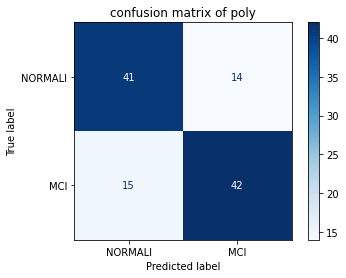

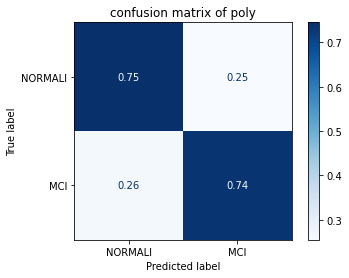

[-32.15352913   5.41011478  -3.88698456  -0.45475943 -18.81491111
 -12.77792319  14.76785782  71.01032089  26.29789375 -26.7694483
  58.24655871 -15.76986198 -15.76986198  -2.68473619  -7.63350619
 -13.67080852   1.00028429  51.77108429  14.96926523  38.86134699
 -32.15352913   3.17082262 -12.61410737  10.01587925 -18.81491111
 -13.02552645 -31.55662056 -32.15352913  53.49663697   0.49399803
  16.20619003 -18.58362913 -32.15352913  -5.87869375  20.90190056
 -32.15352913  13.58158514  15.59297753   2.0727185   14.05128707
  30.12856123 -32.15352913 101.19460538  20.97669679  14.0760772
  39.03402033  30.48782953 -32.15352913 -10.31439265   2.50368448
  -6.75302463 -25.07139514 -32.15352913   8.25941554  88.49536785
  34.40048788  17.93974384 -28.50003691  13.1375653   55.10118837
  -9.72967331  13.73455756  -2.14935706 -32.15352913   6.97584682
  22.15846405   8.01631374  21.24710636 -20.17658953 -15.76986198
 -18.58362913 -28.66517395 -32.15352913  13.19577166  27.25344137
  13.1696780

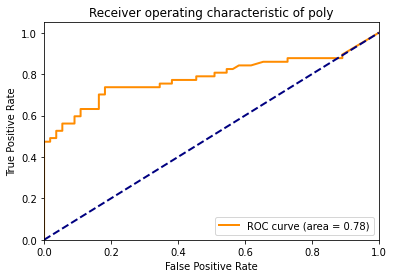

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 0]
Classification report for classifier SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.51      1.00      0.67        57

    accuracy                           0.51       112
   macro avg       0.25      0.50  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


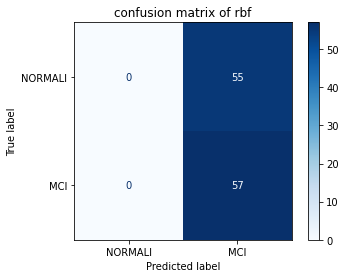

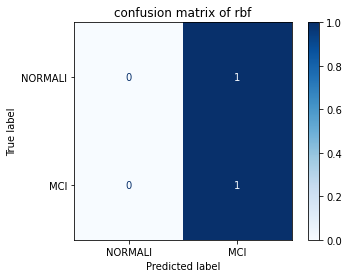

[0.90773951 0.97997821 0.96998364 0.9804077  0.97885716 0.9803567
 0.98035659 0.98035662 0.98055271 0.98020439 0.9803566  0.9653415
 0.9653415  0.97987045 0.98011495 0.94963244 1.         0.9803566
 0.98035659 0.9803566  0.90773951 0.98034498 0.97989594 0.9813615
 0.97885716 0.98018689 0.98035691 0.90773951 0.9803566  0.98027206
 0.9803566  0.96993098 0.90773951 0.97324505 0.9803566  0.90773951
 0.98068246 0.9803566  0.98035434 0.98038389 0.9803566  0.90773951
 0.9803566  0.98040591 0.98035665 0.9803566  0.98036238 0.90773951
 0.96032566 0.98013708 0.980347   0.96846921 0.90773951 0.97993943
 0.9803566  0.98035626 0.9803566  0.92840262 0.98118294 0.9803566
 0.98029766 0.98037937 0.97729818 0.90773951 0.98035786 0.98035671
 0.98036064 0.9803566  0.9803569  0.9653415  0.96993098 0.97463434
 0.90773951 0.98041272 0.98035939 0.98208086 0.9803566  0.95623873
 0.98036052 0.9803566  0.9803566  0.98035691 0.96924823 0.98018146
 0.9803566  0.9803566  0.96924823 0.96729725 0.96729725 0.97990724


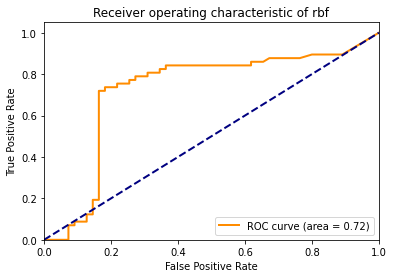

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 0]
Classification report for classifier SVC(C=0.01, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=-10.0, decision_function_shape='ovr', degree=3, gamma=1,
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.51      1.00      0.67        57

    accuracy                           0.51       112
   macro avg       0.25      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


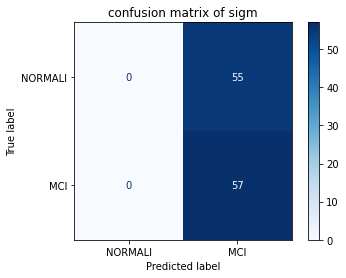

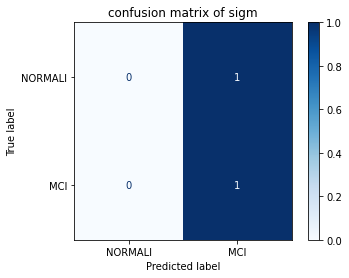

[0.16843343 0.16749049 0.16846238 0.18586559 0.16861025 0.91518199
 0.16212909 0.84630355 0.17978476 0.1613369  0.79936633 0.16859937
 0.16859937 0.16735301 0.16547913 0.16841074 0.16888985 0.50710849
 0.18421148 0.62644931 0.16843343 0.16501448 0.16861976 0.16870552
 0.16861025 0.16855981 0.92940119 0.16843343 0.87806054 0.18635683
 0.67266688 0.15755415 0.16843343 0.16854948 0.49423995 0.16843343
 0.1669508  0.54501065 0.16855103 0.16872236 0.7629199  0.16843343
 0.67977597 0.16956315 0.16735618 0.57539831 0.17108183 0.16843343
 0.14394679 0.16844824 0.16860603 0.16859382 0.16843343 0.16574561
 0.62829169 0.27065772 0.32051164 0.16858241 0.16933279 0.83947994
 0.16970542 0.17143925 0.13246874 0.16843343 0.91597355 0.94727351
 0.18525926 0.60483215 0.9500507  0.16859937 0.15755415 0.16860142
 0.16843343 0.16629523 0.56773332 0.17020556 0.93962375 0.16844611
 0.16903781 0.63473708 0.68394685 0.81905817 0.16853752 0.16864236
 0.48352886 0.7127918  0.16853752 0.16855819 0.16855819 0.1680

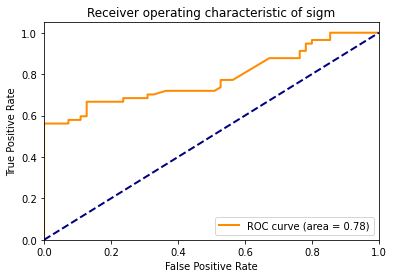

In [ ]:
# DATASET BILANCIATO SVM 2 classi (solo MCI) pesi bilanciati
"""SVM.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19gZOIxFJJC3bVHMfrgTynHz6t33cUjxu
"""

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2


root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
labels = pd.read_csv(os.path.join(root, 'nuovo_dataset_bilanciato.csv'), names=labels_name)
#labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()
last = np.where(y_enc == 1)[0][-1]
X = X[:last+1]
y_enc = y_enc[:last+1]
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
for i in np.arange(1):
  print('MCI weigth = {}'.format(i))
  param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
        'coef0': np.linspace(-10, 10, 5),
        'degree': [2, 3, 4]}
  svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced'), param_grid,
                          cv=5, scoring='recall', refit=True)
  svm_poly.fit(X_train_scaled, y_train)
  print('poly done')
  # RBF
  param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
  rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid,
                          cv=5, scoring='recall', refit=True)
  rbf_poly.fit(X_train_scaled, y_train)
  print('rbf done')
  # Sigmoid
  param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'coef0': np.linspace(-10, 10, 5)}
  sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced'), param_grid,
                          cv=5, scoring='recall', refit=True)
  sigm_poly.fit(X_train_scaled, y_train)
  print('sigmoid done')
  j = 0
  names = ['poly', 'rbf', 'sigm']
  for m in [svm_poly, rbf_poly, sigm_poly]:
      cv_score = m.best_score_
      m = m.best_estimator_
      predicted = m.predict(X_test_scaled)
      print(predicted)
      print(y_test)
      mispredicted = np.where(np.not_equal(y_test, predicted))
      print("Classification report for classifier %s:\n%s\n"
            % (m, classification_report(y_test, predicted)))

      titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
      #class_names = enc_y.classes_
      class_names = ['NORMALI', 'MCI', 'DEMENZA']
      title = 'confusion matrix of {}'.format(names[j])
      for t, opt in titles_options:
        disp = plot_confusion_matrix(m, X_test_scaled, y_test,
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize = opt)
        disp.ax_.set_title(title)      
        plt.show()
        plt.close('all')
      
      y_score = m.decision_function(X_test_scaled)
      fpr, tpr, _ = roc_curve(y_test, y_score)
      print(y_score)
      roc_auc = auc(fpr, tpr)
      lw = 2
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic of {}'.format(title.split(' ')[-1]))
      plt.legend(loc="lower right")
      plt.show()
      j += 1


MCI weigth = 0.4
Classification report for classifier SVC(C=0.1, break_ties=False, cache_size=200, class_weight={1: 0.4}, coef0=10.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        55
           1       0.81      0.74      0.77        57

    accuracy                           0.78       112
   macro avg       0.78      0.78      0.78       112
weighted avg       0.78      0.78      0.78       112




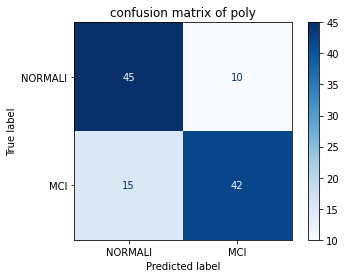

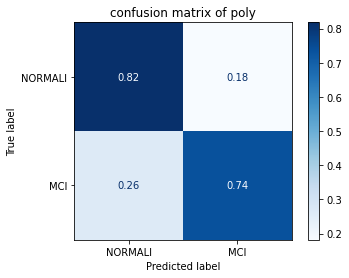

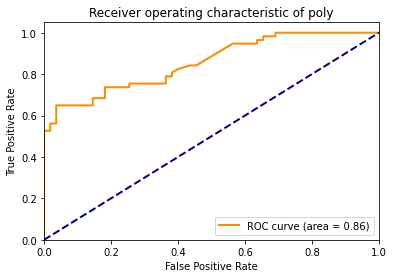

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200, class_weight={1: 0.4}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




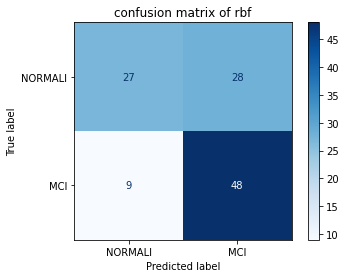

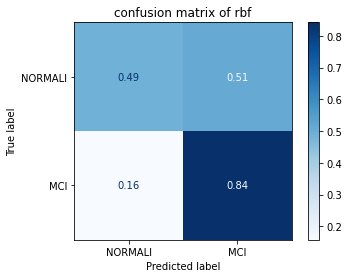

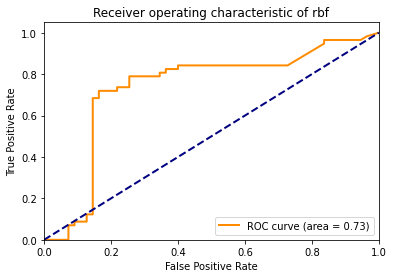

Classification report for classifier SVC(C=100, break_ties=False, cache_size=200, class_weight={1: 0.4}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.63      0.85      0.72        55
           1       0.78      0.51      0.62        57

    accuracy                           0.68       112
   macro avg       0.71      0.68      0.67       112
weighted avg       0.71      0.68      0.67       112




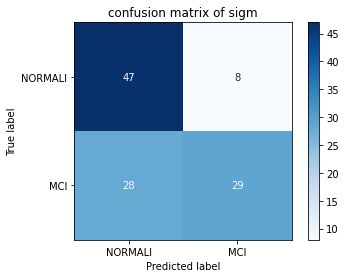

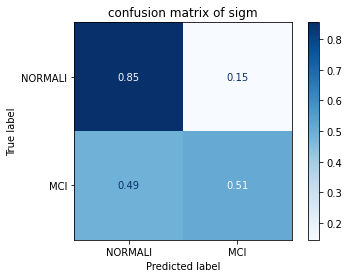

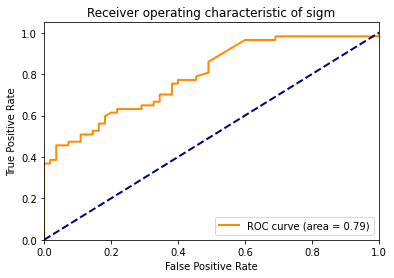

MCI weigth = 0.4444444444444445
Classification report for classifier SVC(C=0.1, break_ties=False, cache_size=200,
    class_weight={1: 0.4444444444444445}, coef0=10.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        55
           1       0.81      0.74      0.77        57

    accuracy                           0.78       112
   macro avg       0.78      0.78      0.78       112
weighted avg       0.78      0.78      0.78       112




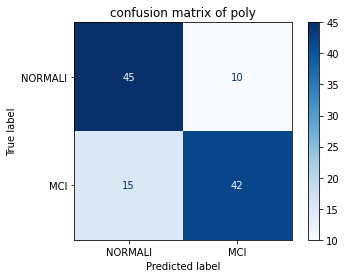

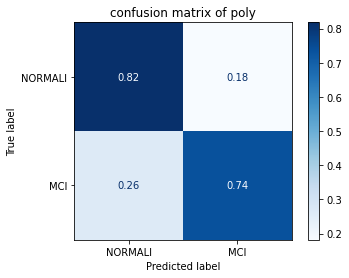

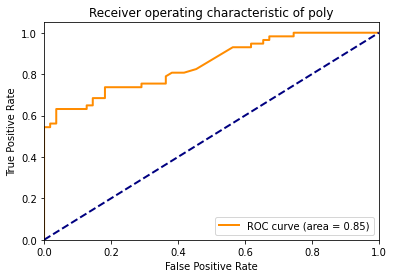

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200,
    class_weight={1: 0.4444444444444445}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




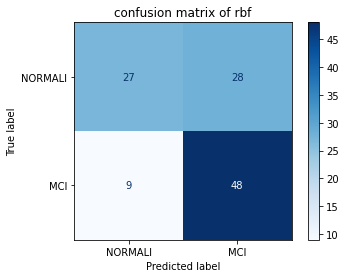

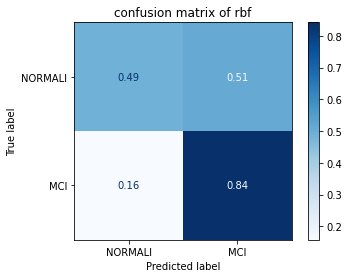

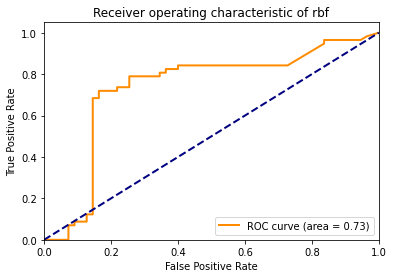

Classification report for classifier SVC(C=100, break_ties=False, cache_size=200,
    class_weight={1: 0.4444444444444445}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.64      0.89      0.74        55
           1       0.83      0.51      0.63        57

    accuracy                           0.70       112
   macro avg       0.73      0.70      0.69       112
weighted avg       0.73      0.70      0.69       112




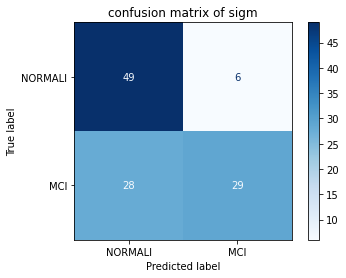

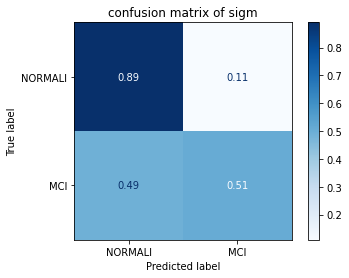

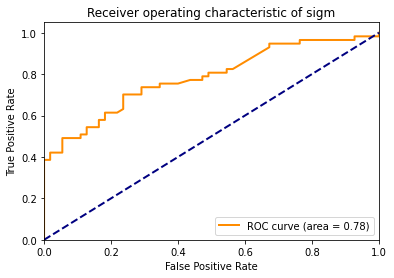

MCI weigth = 0.48888888888888893
Classification report for classifier SVC(C=0.1, break_ties=False, cache_size=200,
    class_weight={1: 0.48888888888888893}, coef0=10.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        55
           1       0.76      0.74      0.75        57

    accuracy                           0.75       112
   macro avg       0.75      0.75      0.75       112
weighted avg       0.75      0.75      0.75       112




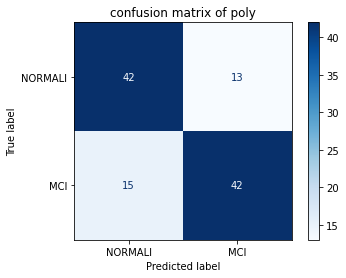

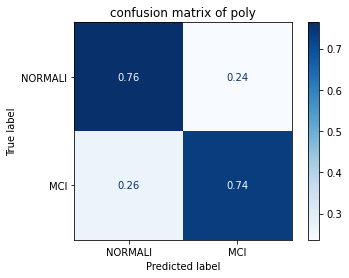

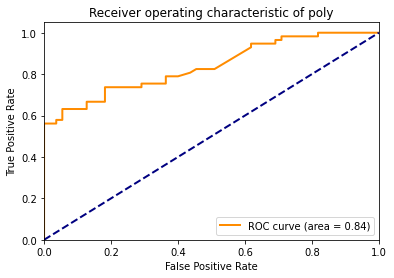

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200,
    class_weight={1: 0.48888888888888893}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




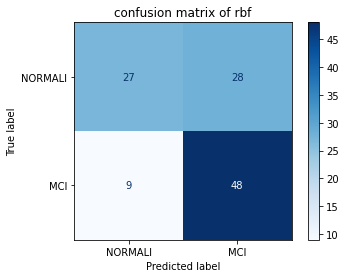

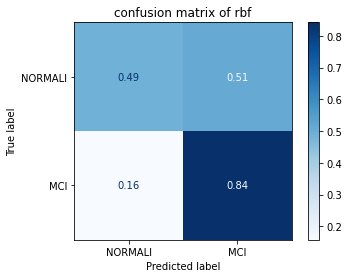

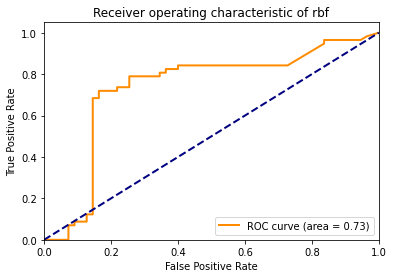

Classification report for classifier SVC(C=1000, break_ties=False, cache_size=200,
    class_weight={1: 0.48888888888888893}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.64      0.89      0.75        55
           1       0.83      0.53      0.65        57

    accuracy                           0.71       112
   macro avg       0.74      0.71      0.70       112
weighted avg       0.74      0.71      0.70       112




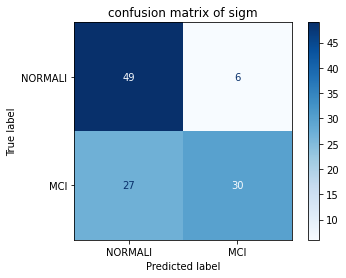

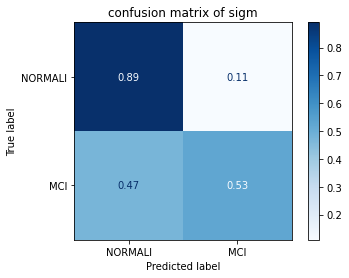

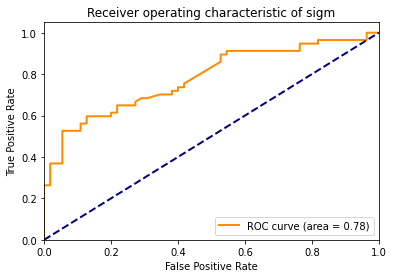

MCI weigth = 0.5333333333333333
Classification report for classifier SVC(C=10, break_ties=False, cache_size=200,
    class_weight={1: 0.5333333333333333}, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.69      0.84      0.75        55
           1       0.80      0.63      0.71        57

    accuracy                           0.73       112
   macro avg       0.74      0.73      0.73       112
weighted avg       0.74      0.73      0.73       112




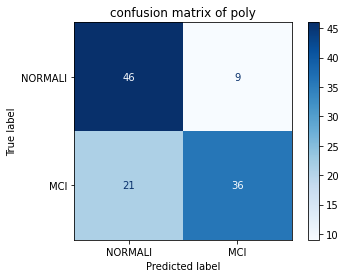

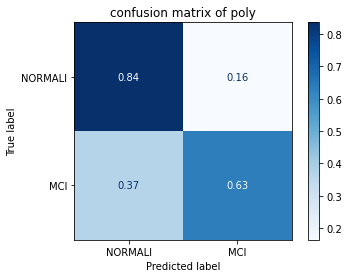

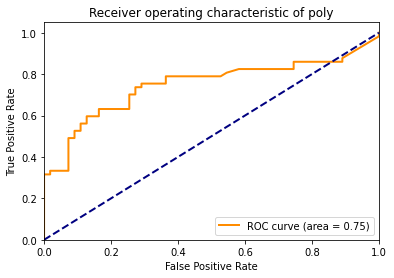

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200,
    class_weight={1: 0.5333333333333333}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




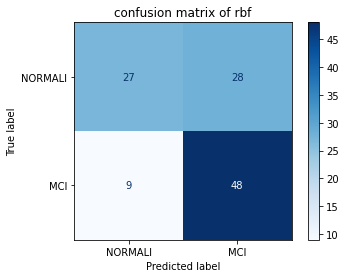

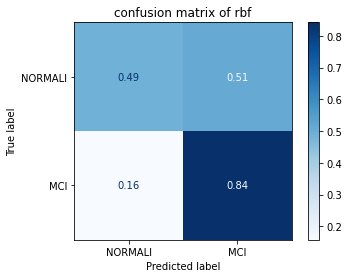

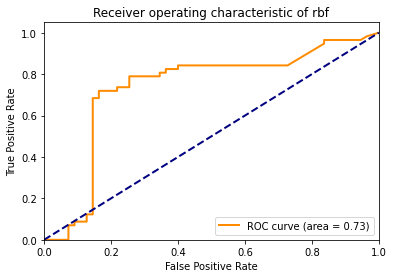

Classification report for classifier SVC(C=1000, break_ties=False, cache_size=200,
    class_weight={1: 0.5333333333333333}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        55
           1       0.78      0.68      0.73        57

    accuracy                           0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.75      0.74      0.74       112




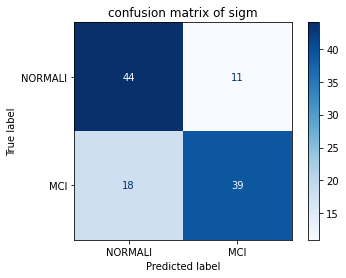

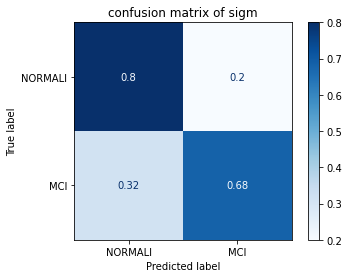

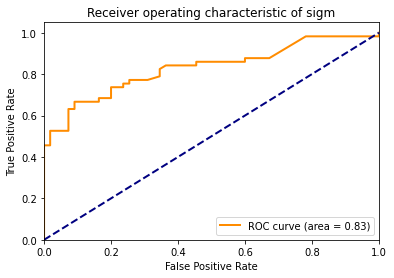

MCI weigth = 0.5777777777777778
Classification report for classifier SVC(C=100, break_ties=False, cache_size=200,
    class_weight={1: 0.5777777777777778}, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.69      0.84      0.75        55
           1       0.80      0.63      0.71        57

    accuracy                           0.73       112
   macro avg       0.74      0.73      0.73       112
weighted avg       0.74      0.73      0.73       112




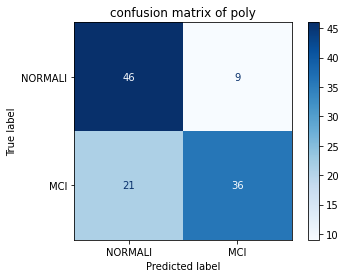

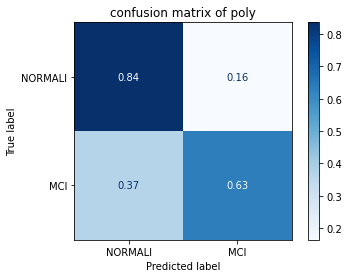

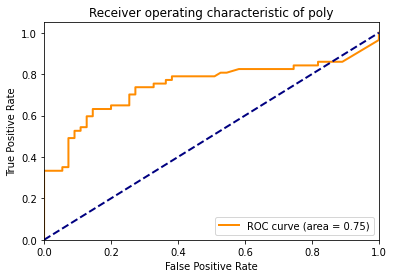

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200,
    class_weight={1: 0.5777777777777778}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




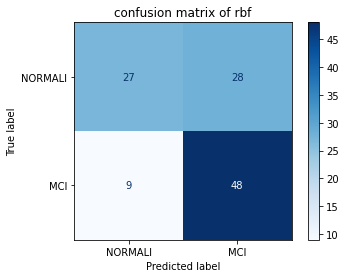

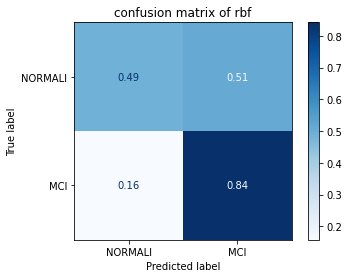

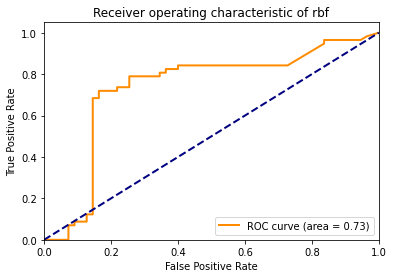

Classification report for classifier SVC(C=1000, break_ties=False, cache_size=200,
    class_weight={1: 0.5777777777777778}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.69      0.84      0.75        55
           1       0.80      0.63      0.71        57

    accuracy                           0.73       112
   macro avg       0.74      0.73      0.73       112
weighted avg       0.74      0.73      0.73       112




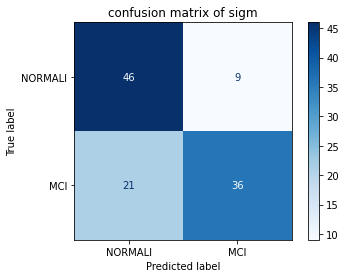

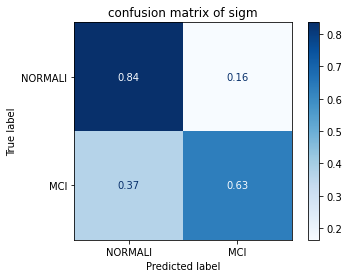

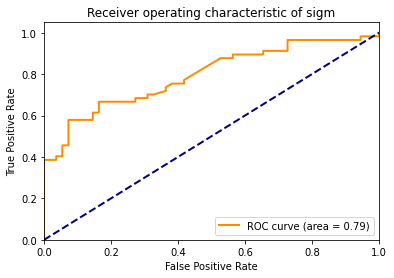

MCI weigth = 0.6222222222222222
Classification report for classifier SVC(C=1000, break_ties=False, cache_size=200,
    class_weight={1: 0.6222222222222222}, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        55
           1       0.80      0.65      0.72        57

    accuracy                           0.74       112
   macro avg       0.75      0.74      0.74       112
weighted avg       0.75      0.74      0.74       112




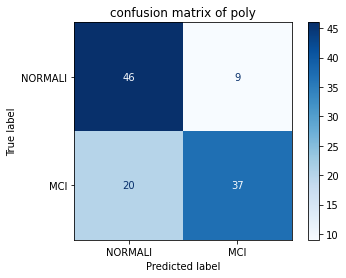

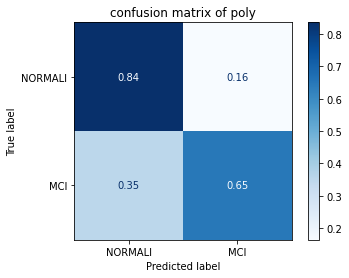

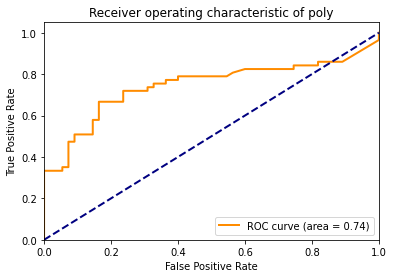

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200,
    class_weight={1: 0.6222222222222222}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




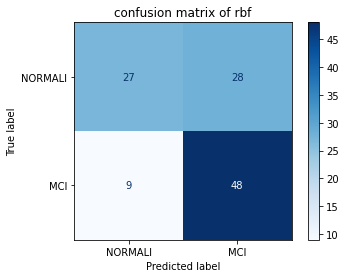

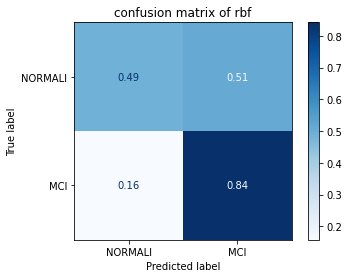

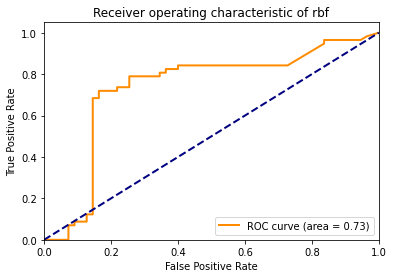

Classification report for classifier SVC(C=100, break_ties=False, cache_size=200,
    class_weight={1: 0.6222222222222222}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        55
           1       0.79      0.53      0.63        57

    accuracy                           0.69       112
   macro avg       0.71      0.69      0.68       112
weighted avg       0.71      0.69      0.68       112




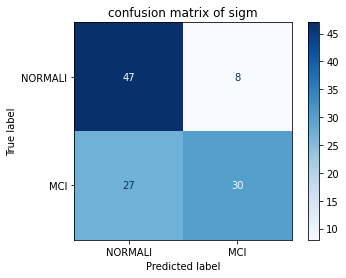

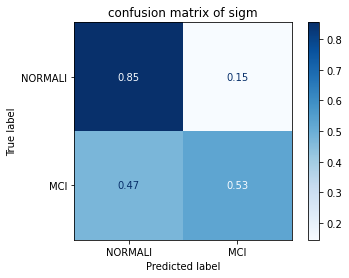

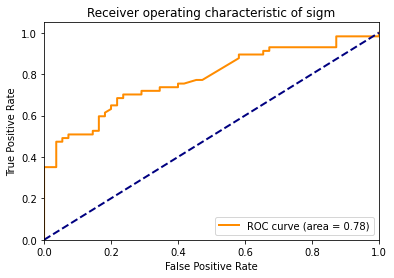

MCI weigth = 0.6666666666666667
Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight={1: 0.6666666666666667},
    coef0=-10.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        55
           1       0.80      0.65      0.72        57

    accuracy                           0.74       112
   macro avg       0.75      0.74      0.74       112
weighted avg       0.75      0.74      0.74       112




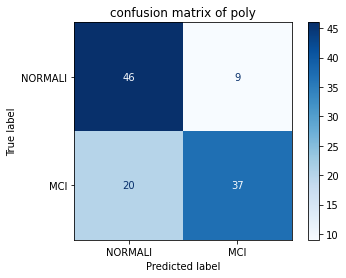

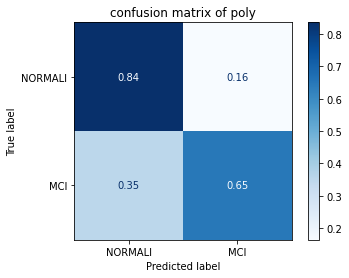

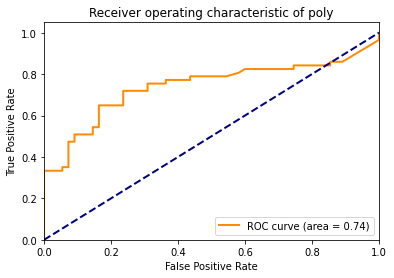

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200,
    class_weight={1: 0.6666666666666667}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




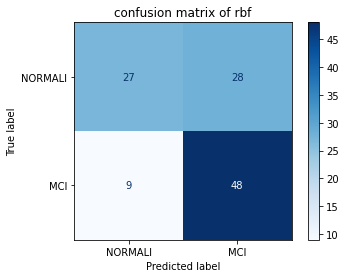

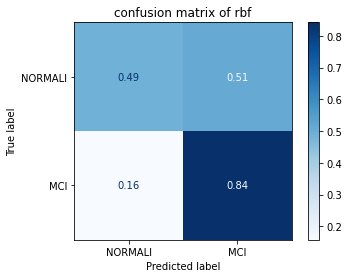

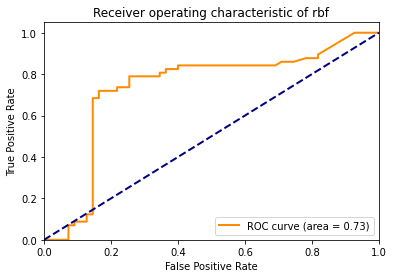

Classification report for classifier SVC(C=1000, break_ties=False, cache_size=200,
    class_weight={1: 0.6666666666666667}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.68      0.80      0.73        55
           1       0.77      0.63      0.69        57

    accuracy                           0.71       112
   macro avg       0.72      0.72      0.71       112
weighted avg       0.72      0.71      0.71       112




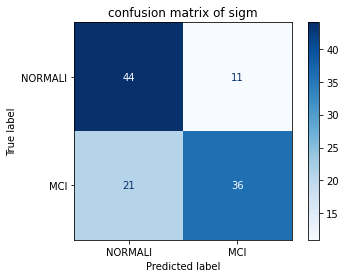

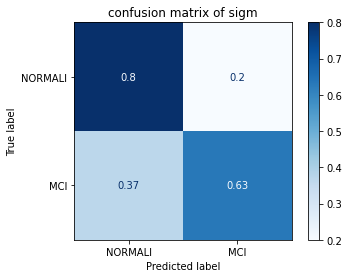

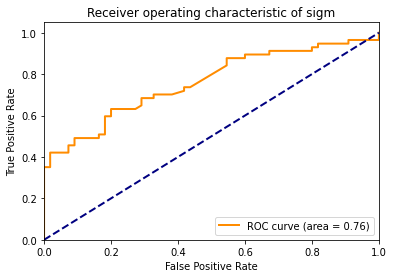

MCI weigth = 0.7111111111111111
Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight={1: 0.7111111111111111},
    coef0=-10.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        55
           1       0.80      0.65      0.72        57

    accuracy                           0.74       112
   macro avg       0.75      0.74      0.74       112
weighted avg       0.75      0.74      0.74       112




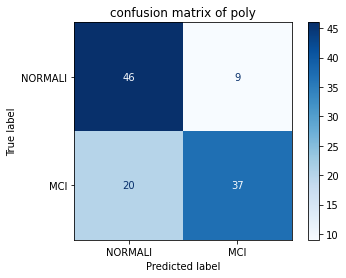

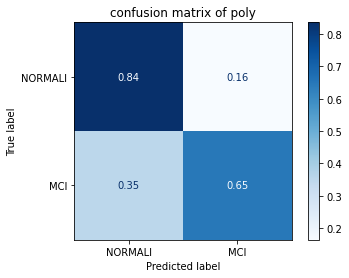

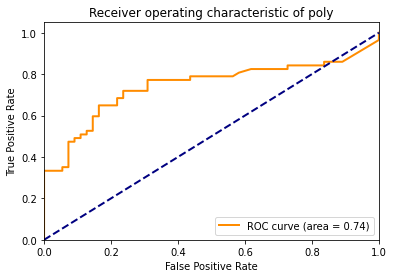

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200,
    class_weight={1: 0.7111111111111111}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




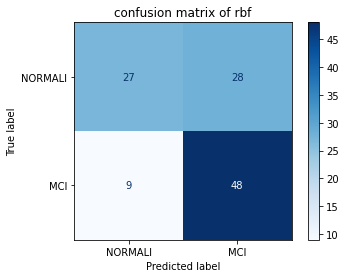

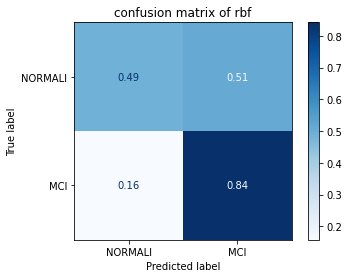

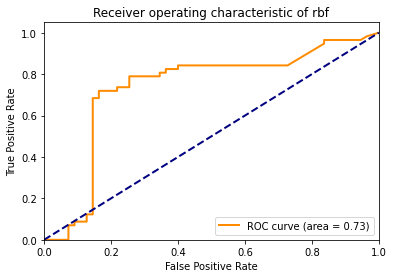

Classification report for classifier SVC(C=100, break_ties=False, cache_size=200,
    class_weight={1: 0.7111111111111111}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        55
           1       0.76      0.61      0.68        57

    accuracy                           0.71       112
   macro avg       0.71      0.71      0.70       112
weighted avg       0.71      0.71      0.70       112




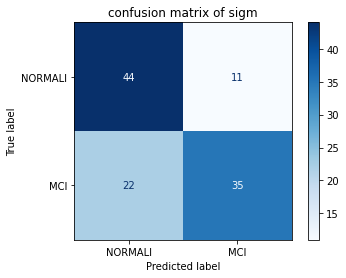

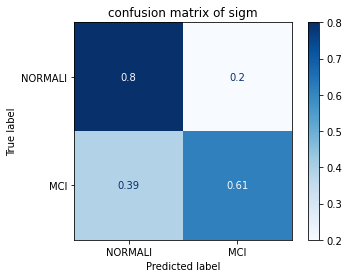

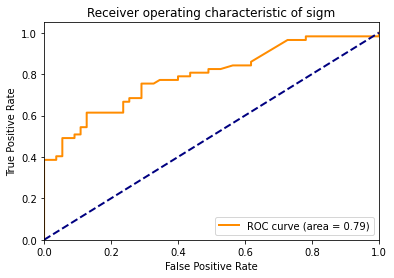

MCI weigth = 0.7555555555555555
Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight={1: 0.7555555555555555},
    coef0=-10.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        55
           1       0.78      0.68      0.73        57

    accuracy                           0.74       112
   macro avg       0.74      0.74      0.74       112
weighted avg       0.75      0.74      0.74       112




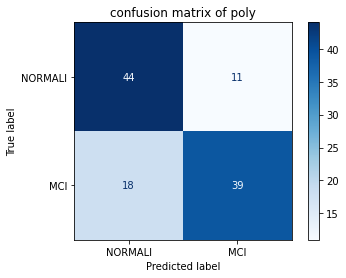

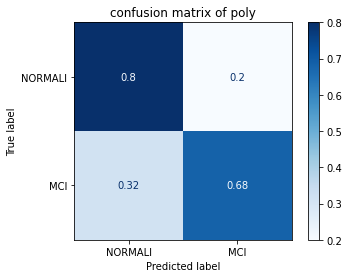

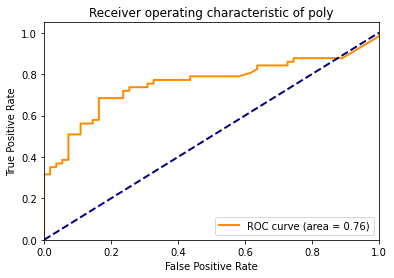

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200,
    class_weight={1: 0.7555555555555555}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




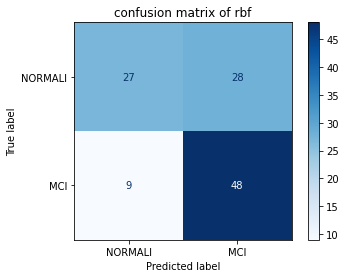

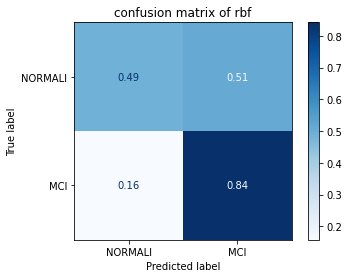

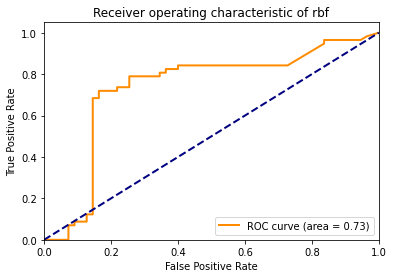

Classification report for classifier SVC(C=100, break_ties=False, cache_size=200,
    class_weight={1: 0.7555555555555555}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        55
           1       0.73      0.63      0.68        57

    accuracy                           0.70       112
   macro avg       0.70      0.70      0.70       112
weighted avg       0.70      0.70      0.70       112




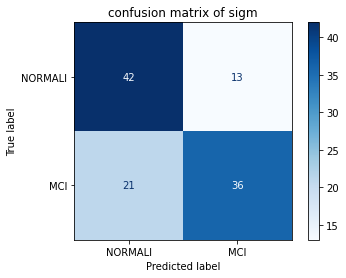

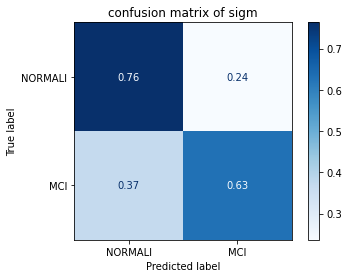

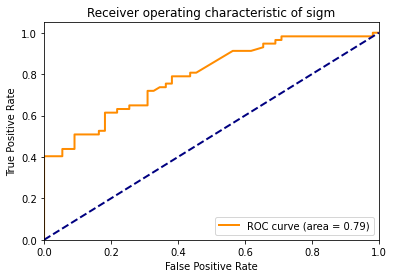

MCI weigth = 0.8
Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight={1: 0.8}, coef0=-10.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        55
           1       0.75      0.70      0.73        57

    accuracy                           0.73       112
   macro avg       0.73      0.73      0.73       112
weighted avg       0.73      0.73      0.73       112




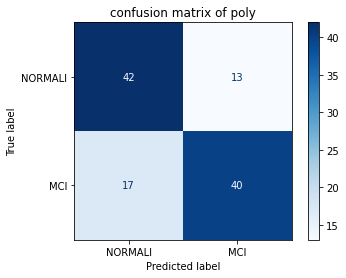

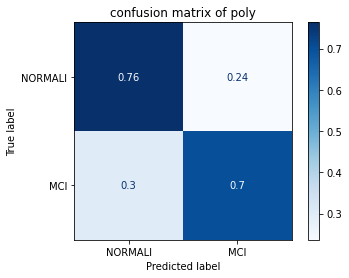

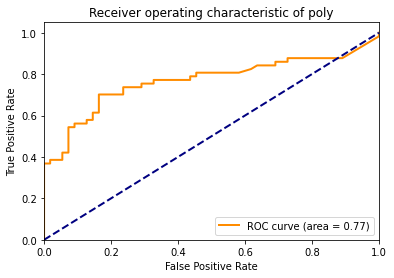

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200, class_weight={1: 0.8}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        55
           1       0.63      0.84      0.72        57

    accuracy                           0.67       112
   macro avg       0.69      0.67      0.66       112
weighted avg       0.69      0.67      0.66       112




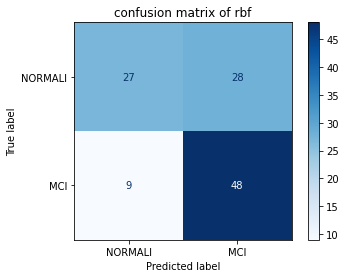

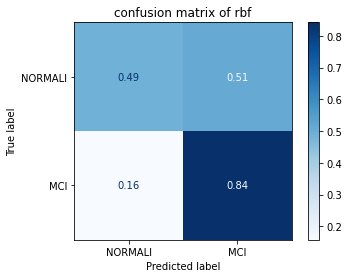

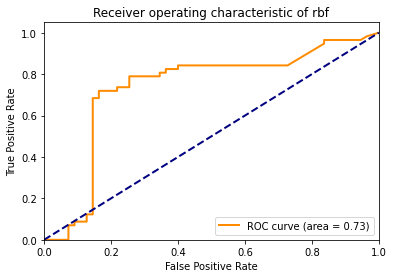

Classification report for classifier SVC(C=10, break_ties=False, cache_size=200, class_weight={1: 0.8}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        55
           1       0.73      0.65      0.69        57

    accuracy                           0.70       112
   macro avg       0.70      0.70      0.70       112
weighted avg       0.70      0.70      0.70       112




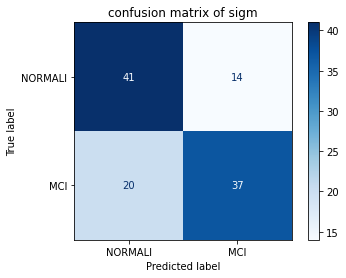

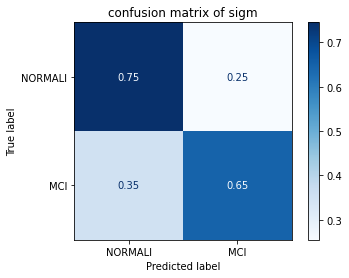

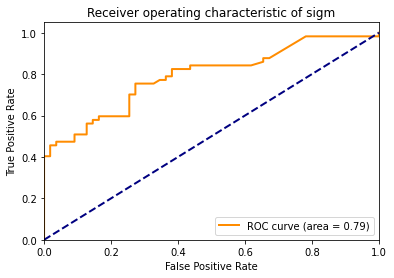

In [ ]:
# DATASET BILANCIATO SVM 2 classi (solo MCI) pesi sbilanciati su MCI
"""SVM.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/19gZOIxFJJC3bVHMfrgTynHz6t33cUjxu
"""


import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib

def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2


root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
labels = pd.read_csv(os.path.join(root, 'nuovo_dataset_bilanciato.csv'), names=labels_name)
#labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()
last = np.where(y_enc == 1)[0][-1]
X = X[:last+1]
y_enc = y_enc[:last+1]
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
for i in np.linspace(0.4, 0.8, num=10):
  print('MCI weigth = {}'.format(i))
  param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
        'coef0': np.linspace(-10, 10, 5),
        'degree': [2, 3, 4]}
  svm_poly = GridSearchCV(SVC(kernel='poly', class_weight={1:i}), param_grid,
                          cv=5, scoring='recall', refit=True)
  svm_poly.fit(X_train_scaled, y_train)
  
  # RBF
  param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
  rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight={1:i}), param_grid,
                          cv=5, scoring='recall', refit=True)
  rbf_poly.fit(X_train_scaled, y_train)
  
  # Sigmoid
  param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'coef0': np.linspace(-10, 10, 5)}
  sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight={1:i}), param_grid,
                          cv=5, scoring='recall', refit=True)
  sigm_poly.fit(X_train_scaled, y_train)
  
  j = 0
  names = ['poly', 'rbf', 'sigm']
  for m in [svm_poly, rbf_poly, sigm_poly]:
      cv_score = m.best_score_
      m = m.best_estimator_
      predicted = m.predict(X_test_scaled)
      
      mispredicted = np.where(np.not_equal(y_test, predicted))
     
      print("Classification report for classifier %s:\n%s\n"
            % (m, classification_report(y_test, predicted)))

      titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
      #class_names = enc_y.classes_
      class_names = ['NORMALI', 'MCI', 'DEMENZA']
      title = 'confusion matrix of {}'.format(names[j])
      for t, opt in titles_options:
        disp = plot_confusion_matrix(m, X_test_scaled, y_test,
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize = opt)
        disp.ax_.set_title(title)      
        plt.show()
        plt.close('all')
      
      y_score = m.decision_function(X_test_scaled)
      fpr, tpr, _ = roc_curve(y_test, y_score)
      
      roc_auc = auc(fpr, tpr)
      lw = 2
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver operating characteristic of {}'.format(title.split(' ')[-1]))
      plt.legend(loc="lower right")
      plt.show()
      j += 1

[0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1
 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0]
Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'):
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        55
           1       0.74      0.70      0.72        57

    accuracy                           0.72       112
   macro avg       0.72      0.72      0.72       112
weighted avg       0.72      0.

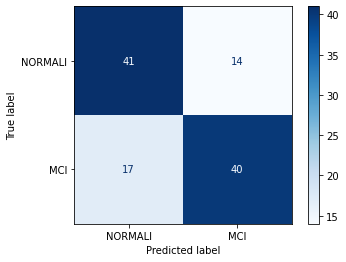

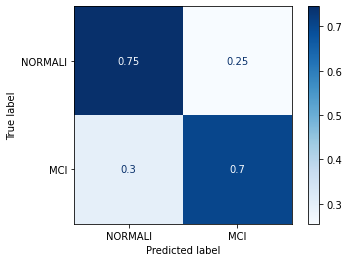

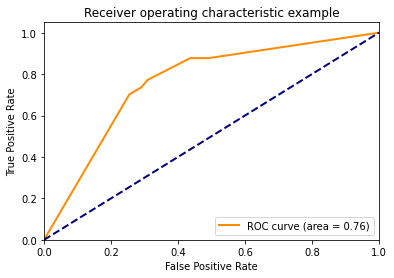

In [ ]:
# DATASET BILANCIATO decisiontree 2 classi (solo MCI) pesi bilanciati
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib



def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2

root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
labels = pd.read_csv(os.path.join(root, 'nuovo_dataset_bilanciato.csv'), names=labels_name)
#labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()
last = np.where(y_enc == 1)[0][-1]
X = X[:last+1]
y_enc = y_enc[:last+1]
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)

clf = DecisionTreeClassifier(class_weight='balanced', random_state=0).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(predicted)
print("Classification report for classifier %s:\n%s\n"
            % (clf, classification_report(y_test, predicted)))
titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
      #class_names = enc_y.classes_
class_names = ['NORMALI', 'MCI']
for title, opt in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize = opt)
      
        plt.show()
        plt.close('all')
y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()  

MCI weigth = 0.05644444444444444
[0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0]
Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight={1: 0.05644444444444444},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best'):
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        55
           1       0.82      0.74      0.78        57

    accuracy                           0.79       112
   macro avg       0.79      0.79     

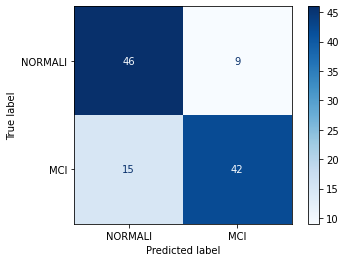

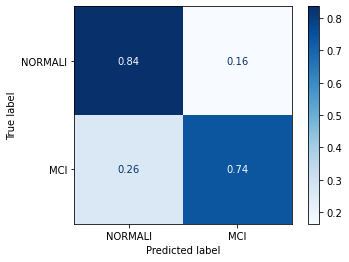

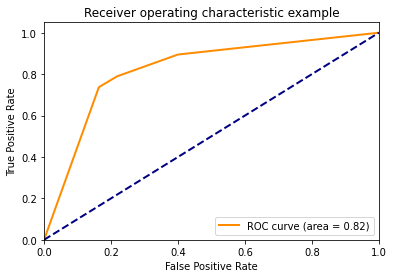

In [ ]:
# DATASET BILANCIATO decision-tree 2 classi (solo MCI) pesi sbilanciati su MCI
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.utils import shuffle
import joblib



def label(s):
    if s == 'NORMALI':
        return 0
    if s == 'MCI':
        return 1
    if s == 'DEMENZA':
        return 2

root = './gdrive/My Drive/thesis' #modificare se cartella rinominata
labels_name = list(range(1, 20))
labels = pd.read_csv(os.path.join(root, 'nuovo_dataset_bilanciato.csv'), names=labels_name)
#labels = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
X = labels.iloc[:, :-1].to_numpy()
y_enc = labels.iloc[:, -1].to_numpy()
last = np.where(y_enc == 1)[0][-1]
X = X[:last+1]
y_enc = y_enc[:last+1]
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.4, random_state=0)
i= 0.05644444444444444
print('MCI weigth = {}'.format(i))
clf = DecisionTreeClassifier(class_weight={1:i}, random_state=0).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(predicted)
print("Classification report for classifier %s:\n%s\n"
            % (clf, classification_report(y_test, predicted)))
titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
      #class_names = enc_y.classes_
class_names = ['NORMALI', 'MCI']
for title, opt in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                  display_labels=class_names,
                                  cmap=plt.cm.Blues,
                                  normalize = opt)
      
        plt.show()
        plt.close('all')
y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()  

In [ ]:
joblib.dump(clf, 'gdrive/My Drive/class_2_model.joblib')

['gdrive/My Drive/class_2_model.joblib']